# **Credit Card Fraud Detection**



Credit card fraud detection is a critical aspect of financial security, involving the identification of unauthorized and suspicious transactions to prevent financial losses for both cardholders and financial institutions. With the increasing volume and sophistication of fraudulent activities, traditional detection methods have become inadequate, necessitating advanced approaches leveraging machine learning and data analysis.   

This study explores the development and implementation of a machine learning model to detect fraudulent credit card transactions. The primary objectives include analyzing transaction data to identify patterns indicative of fraud, evaluating various machine learning algorithms, and optimizing the chosen model for high accuracy and low false positive rates.  

Key steps in the research include:







**1. Data Collection and Preprocessing**  

**2. Model Selection and Training**  

**3. Evaluation Metrics**










# **Data Preprocessing** :

Missing values need to be addressed in the datasets. Since credit card transactions can have a wide range of values, scaling helps bring features to a similar range.

# **Importing required Libraries**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Credit Card Fraud Detection Dataset:**

**Description**: These dataset contains transactions made by using credit crads.They consists of very less fraud transactions, making them highly imbalanced.  

**Features**: 30 features, including time, amount, and 28 anonymized features resulting from a PCA transformation.  

**Target**: A binary variable indicating whether the transaction is fraudulent (1) or not (0).

# **1. Adequacy of Data** :

Check the number of records and features in each dataset to ensure they are adequate for analysis.

In [ ]:
# Loading all the four datasets and checking adequecy that is number of records and features in each dataset.



datasets = [pd.read_csv('/kaggle/input/cc-dataset/dataset1.csv'), pd.read_csv('/kaggle/input/cc-dataset/dataset2.csv')]



for i, dataset in enumerate(datasets, start=1):

    print(f'Dataset {i} shape: {dataset.shape}')


Dataset 1 shape: (56962, 30)
Dataset 2 shape: (284807, 31)


**Printing first 5 lines of each dataset**

In [ ]:


for i, dataset in enumerate(datasets,start=1):

  print(f'First 5 Lines of Dataset {i} :' )

  print(dataset.head())

  print('\n')


First 5 Lines of Dataset 1 :
         V1        V2        V3        V4        V5        V6        V7  \
0  1.256229 -0.506944  0.482418  0.115658 -1.022264 -0.522547 -0.415670   
1  0.944330 -1.830559 -0.311509 -1.230706 -1.105964  0.059692 -0.437650   
2  1.246314  0.366946  0.297959  1.118263 -0.272567 -0.969192  0.215065   
3 -1.152825  0.462867  0.995502  0.703443  0.409895 -0.448310 -0.298842   
4  1.151825  0.315842  0.513422  1.152740 -0.262601 -0.607620  0.127761   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0 -0.057159 -0.912658  0.796623  ... -0.444295 -0.703718  0.020491  0.550057   
1 -0.136275 -2.245879  1.356977  ...  0.024525  0.025444 -0.360068 -0.243700   
2 -0.231450 -0.012874  0.016361  ...  0.026556  0.125002 -0.097595  0.397102   
3  0.644459 -1.026941 -0.520884  ...  0.010666 -0.359297  0.072184 -0.014728   
4 -0.138176 -0.099944 -0.063739  ...  0.136174  0.497671 -0.061487  0.428082   

        V25       V26       V27       V

# **2. Check Data Quality for Each Dataset**  

Checking the structure of each dataset using info(). This step gives us an understanding of the number of columns, data types, and any missing values in each dataset. It's essential to know what data we're working with and whether any columns need special attention (e.g., missing or improperly formatted values).


In [ ]:
# checking the quality of datasets

for i, dataset in enumerate(datasets,start=1):

  print(f'Dataset {i} info:')

  print(dataset.info())

  print('/n')




Dataset 1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      56962 non-null  float64
 1   V2      56962 non-null  float64
 2   V3      56962 non-null  float64
 3   V4      56962 non-null  float64
 4   V5      56962 non-null  float64
 5   V6      56962 non-null  float64
 6   V7      56962 non-null  float64
 7   V8      56962 non-null  float64
 8   V9      56962 non-null  float64
 9   V10     56962 non-null  float64
 10  V11     56962 non-null  float64
 11  V12     56962 non-null  float64
 12  V13     56962 non-null  float64
 13  V14     56962 non-null  float64
 14  V15     56962 non-null  float64
 15  V16     56962 non-null  float64
 16  V17     56962 non-null  float64
 17  V18     56962 non-null  float64
 18  V19     56962 non-null  float64
 19  V20     56962 non-null  float64
 20  V21     56962 non-null  float64
 21  V22     56962 non-n

# **3. Checking for Data Imbalance**

Data imbalance refers to a situation in which one class (often the "normal" or "non-fraudulent" class) has significantly more instances than another class (often the "anomalous" or "fraudulent" class).

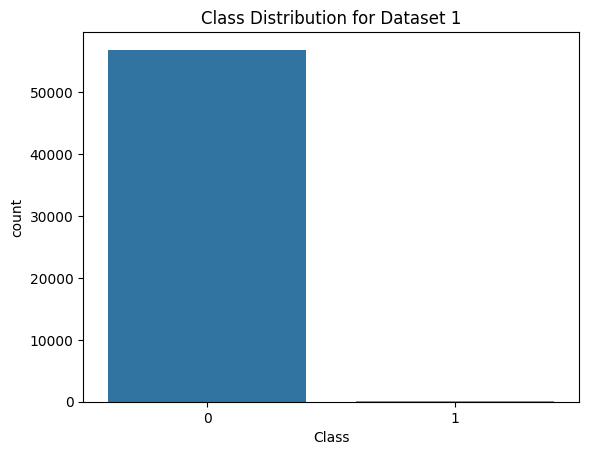

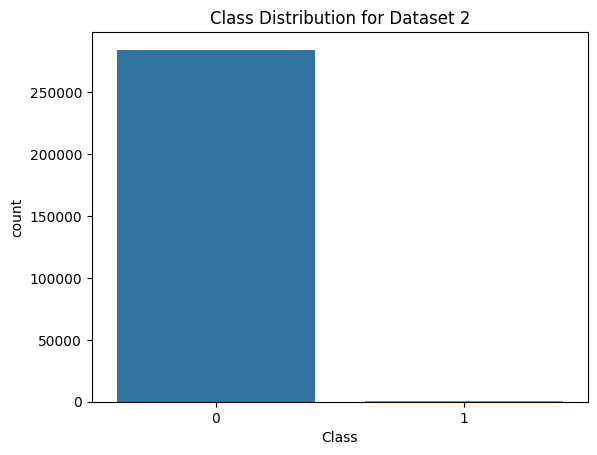

In [ ]:
# plot imbalance for all datasets



for i, dataset in enumerate(datasets, start=1):

    sns.countplot(x='Class', data=dataset)

    plt.title(f'Class Distribution for Dataset {i}')

    plt.show()

This Shows Dataset 1, 2 are highly **Imbalanced**

# **4.Descriptive analysis of the DataSet**

Descriptive analysis focuses on summarizing and interpreting raw data to understand its patterns, trends, and characteristics. It is often the first step in data analysis and helps to provide an overview of what the data looks like. It includes :



**Measures of Central Tendency:** Mean , Median , Mode.  

**Measures of Dispersion:** Range , Variance , Standard Deviation , Percentiles/Quartiles.  

**Data Distribution:** Understanding how data is spread across the range of values (e.g., normal distribution, skewness).   

**Relationship Between Variables:** Correlation.   

In [ ]:
#Descriptive analysis :



for i, dataset in enumerate(datasets, start=1):

    print(f'Dataset {i} descriptive statistics:')

    print(dataset.describe())

Dataset 1 descriptive statistics:
                 V1            V2            V3            V4            V5  \
count  56962.000000  56962.000000  56962.000000  56962.000000  56962.000000   
mean      -0.003570      0.005923      0.003477      0.002591     -0.002930   
std        1.972609      1.650806      1.518226      1.417002      1.377950   
min      -35.905105    -44.639245    -30.177317     -5.560118    -40.427726   
25%       -0.917370     -0.590690     -0.885377     -0.847603     -0.696524   
50%        0.024808      0.070011      0.190968     -0.021140     -0.061015   
75%        1.314508      0.808329      1.035234      0.746804      0.609848   
max        2.451888     16.497472      4.079168     12.699542     34.099309   

                 V6            V7            V8            V9           V10  \
count  56962.000000  56962.000000  56962.000000  56962.000000  56962.000000   
mean      -0.005929      0.002650     -0.004694      0.007941      0.001529   
std        1.3314

#**7. Handling Missing or Irrelevant Values**

Replace null values with the mean of the column. These are done to deal with data efficiently. Algorithms such as KNN are not able to deal with missing values so they nedd to be handled.

In [ ]:


for i, dataset in enumerate(datasets, start=1):

    print(f'Dataset {i} missing values:')

    print(dataset.isnull().sum())

    print('\n')


Dataset 1 missing values:
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Dataset 2 missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64




So there is no missing value in All the four Datasets.

# **9. Data Cleaning Results**

**Checked for missing values:** Used df.isnull().sum() to check for missing values in each dataset.

# **10. Distribution Pattern of Data**

Identifying the distribution pattern of data helps in understanding the underlying structure, trends, and behavior of the dataset.

Dataset 1 histograms:


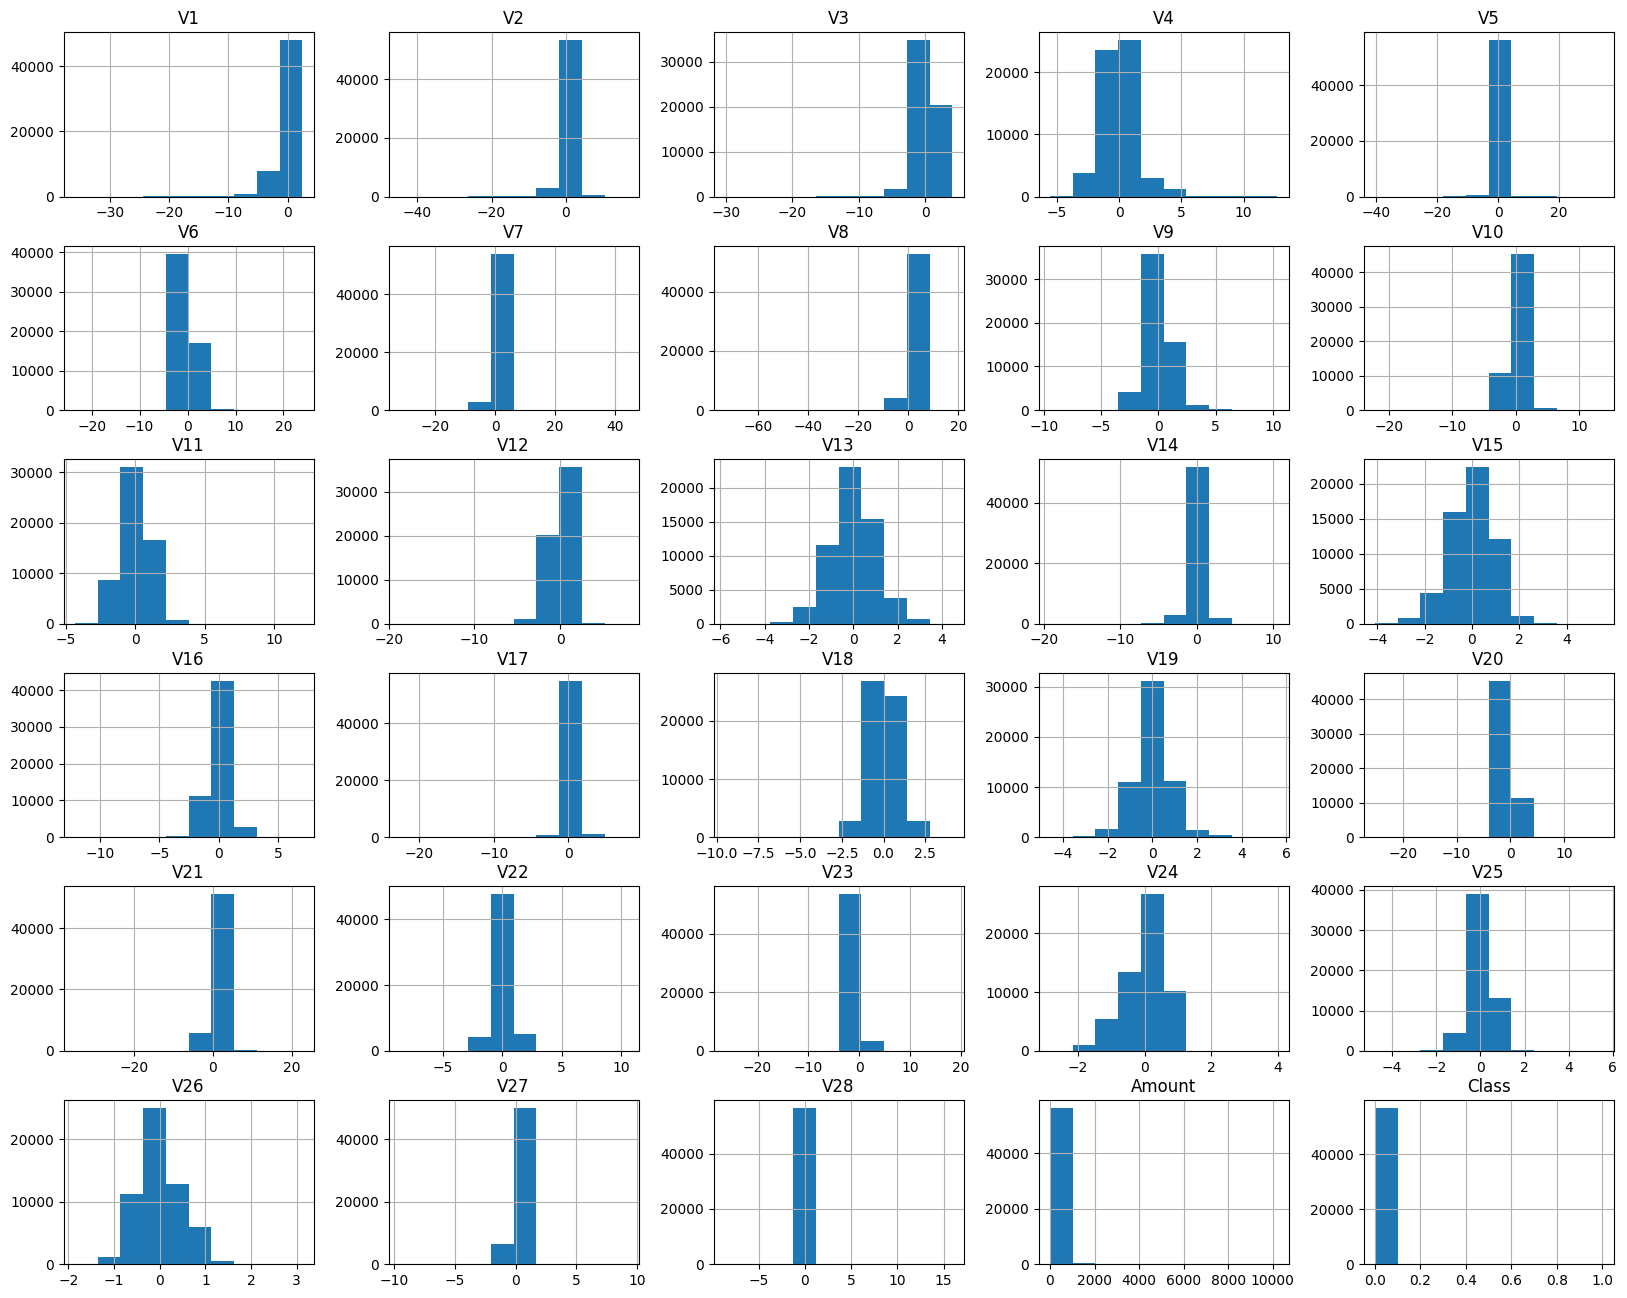

Dataset 2 histograms:


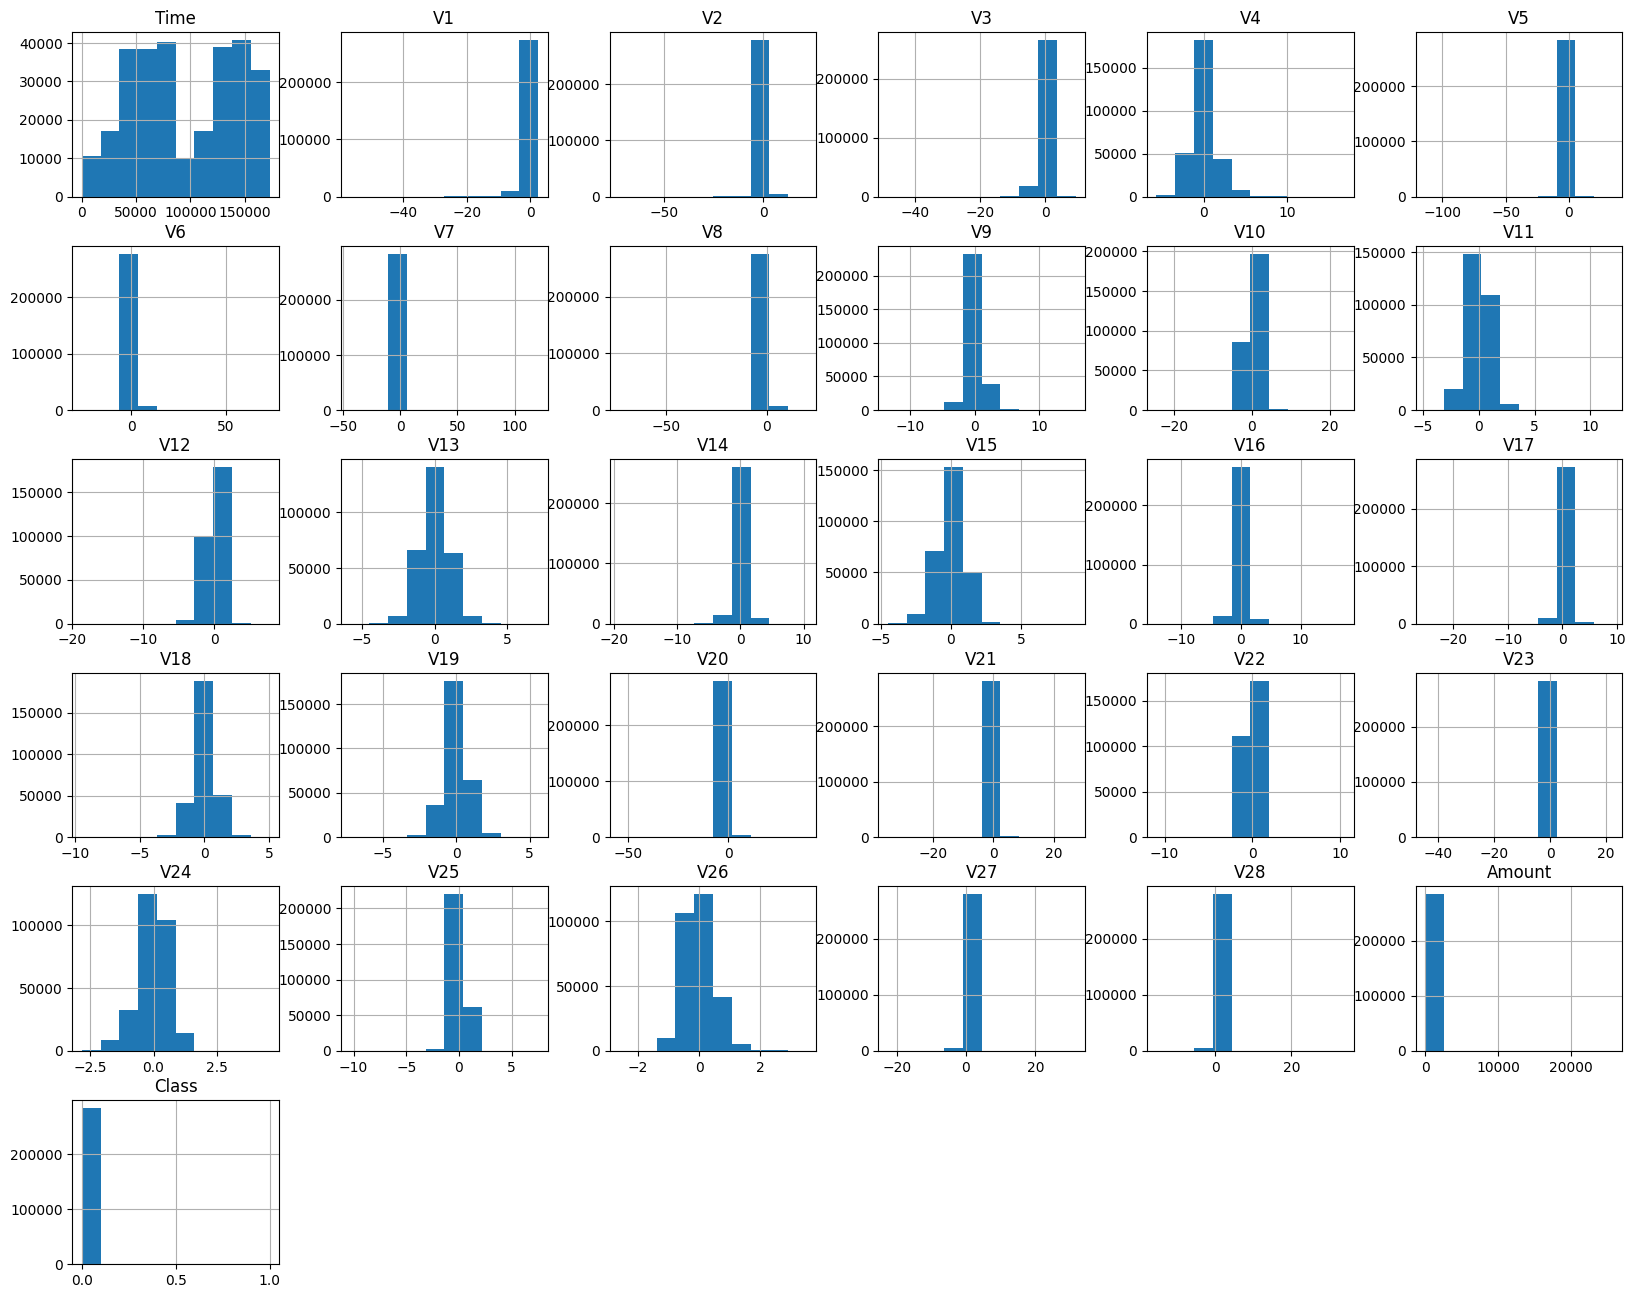

In [ ]:
# Histograms of Data

for i, dataset in enumerate(datasets, start=1):

    print(f'Dataset {i} histograms:')

    dataset.hist(figsize=(20, 16))

    plt.show()

# **Sampling the dataSets**

1. **RandomOverSampler**
2. **ADASYN Oversampling**
3. **Oversampling Using SMOTE**
4. **BorderlineSMOTE**
5. **SVMSMOTE**
6. **UnderSampling**

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Placeholder for datasets
oversampled_datasets1 = []  # For RandomOverSampler
oversampled_datasets2 = []  # For ADASYN
oversampled_datasets3 = []  # For SMOTE
oversampled_datasets4 = []  # For BorderlineSMOTE
oversampled_datasets5 = []  # For SVMSMOTE
undersampled_datasets = []

for dataset in datasets:
    # Separating features and labels
    X = dataset.drop('Class', axis=1)
    y = dataset['Class']

    # SMOTE Oversampling (Existing)
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    oversampled_datasets3.append(pd.concat([X_smote, y_smote], axis=1))

    # RandomOverSampler Oversampling (New Dataset 1)
    ros = RandomOverSampler(random_state=42)
    X_ros, y_ros = ros.fit_resample(X, y)
    oversampled_datasets1.append(pd.concat([X_ros, y_ros], axis=1))

    # ADASYN Oversampling (New Dataset 2)
    adasyn = ADASYN(random_state=42)
    X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
    oversampled_datasets2.append(pd.concat([X_adasyn, y_adasyn], axis=1))

    # BorderlineSMOTE Oversampling (New Dataset 4)
    borderline_smote = BorderlineSMOTE(random_state=42)
    X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)
    oversampled_datasets4.append(pd.concat([X_borderline_smote, y_borderline_smote], axis=1))

    # SVMSMOTE Oversampling (New Dataset 6)
    svm_smote = SVMSMOTE(random_state=42)
    X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)
    oversampled_datasets5.append(pd.concat([X_svm_smote, y_svm_smote], axis=1))

    # Undersampling using RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)
    X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
    undersampled_datasets.append(pd.concat([X_undersampled, y_undersampled], axis=1))


In [ ]:
print("Oversampled Datasets using RandomOverSampler")
for i, dataset in enumerate(oversampled_datasets1, start=1):

    print(f'Dataset {i} shape: {dataset.shape}')

print("\n")
print("Oversampled Datasets using ADASYN")

for i, dataset in enumerate(oversampled_datasets2, start=1):

    print(f'Dataset {i} shape: {dataset.shape}')

print("\n")
print("Oversampled Datasets using SMOTE")

for i, dataset in enumerate(oversampled_datasets3, start=1):

    print(f'Dataset {i} shape: {dataset.shape}')

print("\n")
print("Oversampled Datasets using BorderlineSMOTE")

for i, dataset in enumerate(oversampled_datasets4, start=1):

    print(f'Dataset {i} shape: {dataset.shape}')

print("\n")
print("Oversampled Datasets using SVMSMOTE")

for i, dataset in enumerate(oversampled_datasets5, start=1):

    print(f'Dataset {i} shape: {dataset.shape}')

Oversampled Datasets using RandomOverSampler
Dataset 1 shape: (113720, 30)
Dataset 2 shape: (568630, 31)


Oversampled Datasets using ADASYN
Dataset 1 shape: (113728, 30)
Dataset 2 shape: (568613, 31)


Oversampled Datasets using SMOTE
Dataset 1 shape: (113720, 30)
Dataset 2 shape: (568630, 31)


Oversampled Datasets using BorderlineSMOTE
Dataset 1 shape: (113720, 30)
Dataset 2 shape: (568630, 31)


Oversampled Datasets using SVMSMOTE
Dataset 1 shape: (113720, 30)
Dataset 2 shape: (568630, 31)


In [ ]:
for i, dataset in enumerate(undersampled_datasets, start=1):

    print(f'Dataset {i} shape: {dataset.shape}')

Dataset 1 shape: (204, 30)
Dataset 2 shape: (984, 31)


# **Plotting the Sampled datasets**

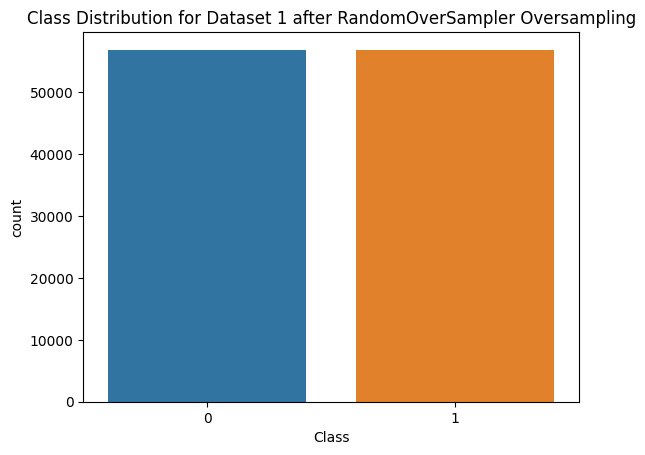

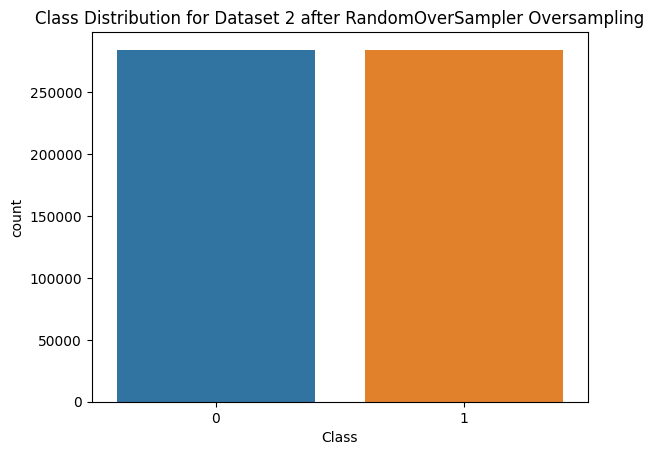

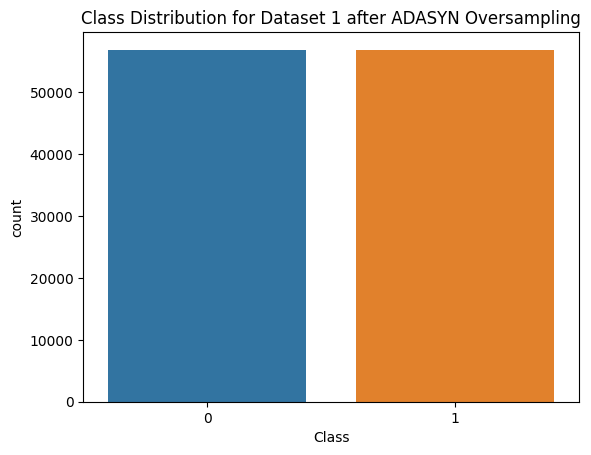

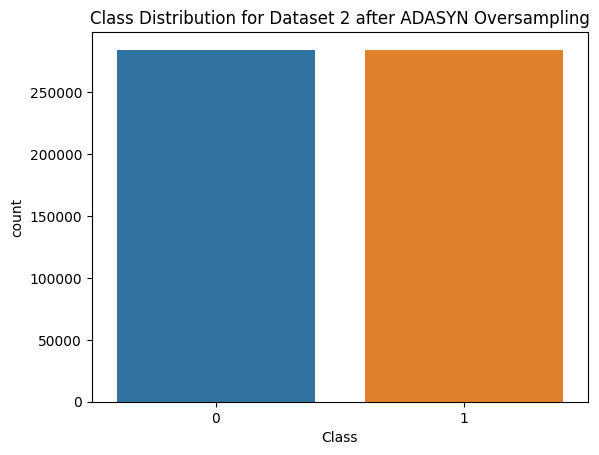

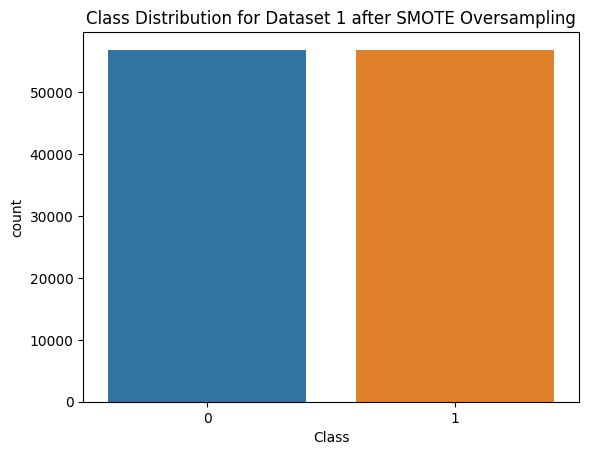

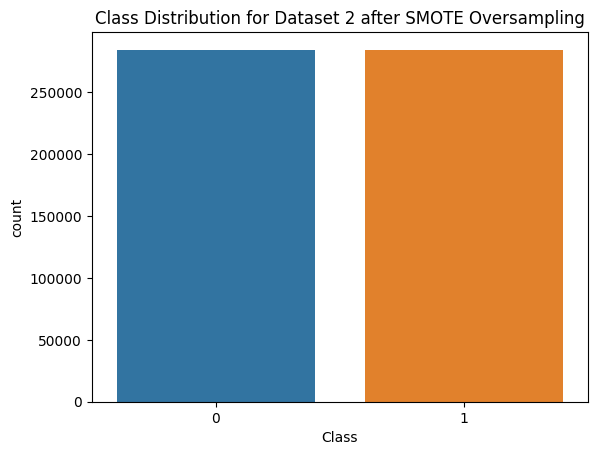

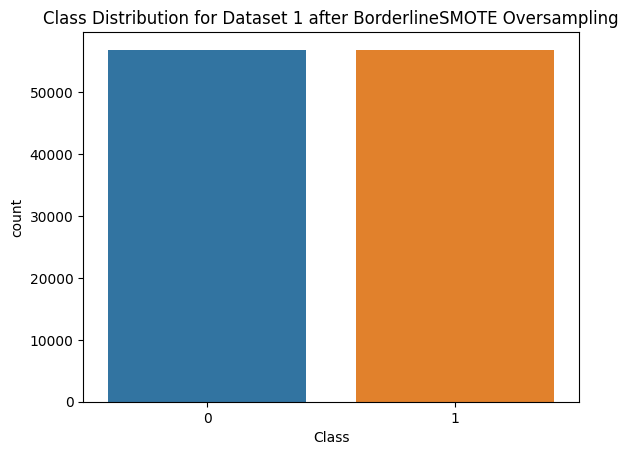

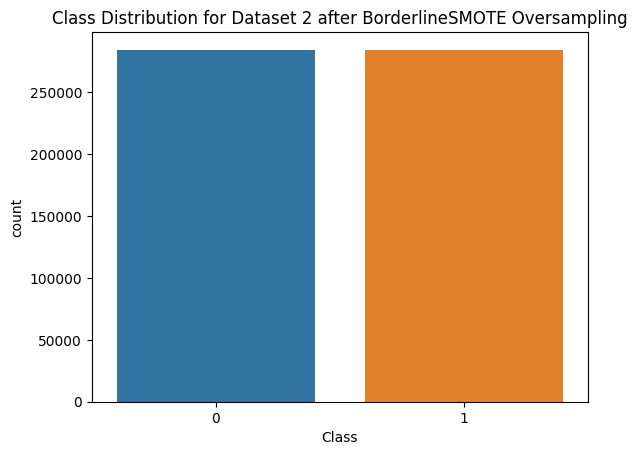

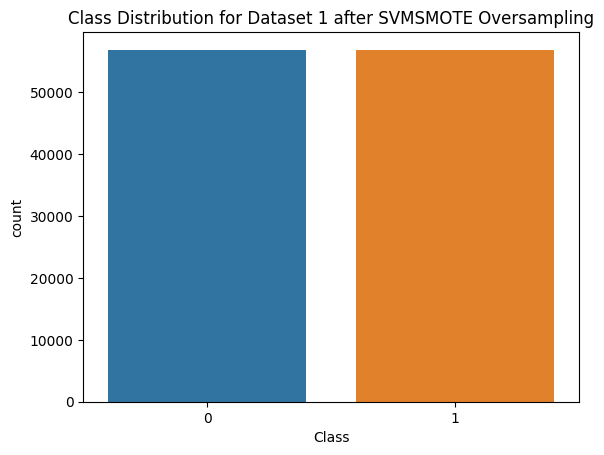

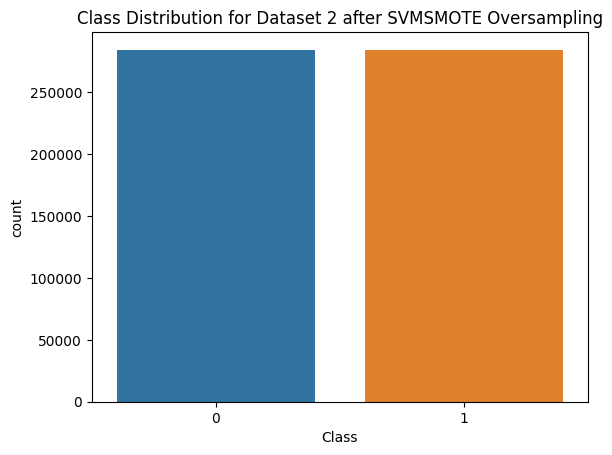

In [ ]:
# Plotting the Sampled datasets



for i, dataset in enumerate(oversampled_datasets1, start=1):

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']



    sns.countplot(x='Class', data=dataset)

    plt.title(f'Class Distribution for Dataset {i} after RandomOverSampler Oversampling')

    plt.show()

print("\n")

for i, dataset in enumerate(oversampled_datasets2, start=1):

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']



    sns.countplot(x='Class', data=dataset)

    plt.title(f'Class Distribution for Dataset {i} after ADASYN Oversampling')

    plt.show()


print("\n")
for i, dataset in enumerate(oversampled_datasets3, start=1):

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']



    sns.countplot(x='Class', data=dataset)

    plt.title(f'Class Distribution for Dataset {i} after SMOTE Oversampling')

    plt.show()


print("\n")

for i, dataset in enumerate(oversampled_datasets4, start=1):

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']



    sns.countplot(x='Class', data=dataset)

    plt.title(f'Class Distribution for Dataset {i} after BorderlineSMOTE Oversampling')

    plt.show()


print("\n")
for i, dataset in enumerate(oversampled_datasets5, start=1):

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']



    sns.countplot(x='Class', data=dataset)

    plt.title(f'Class Distribution for Dataset {i} after SVMSMOTE Oversampling')

    plt.show()

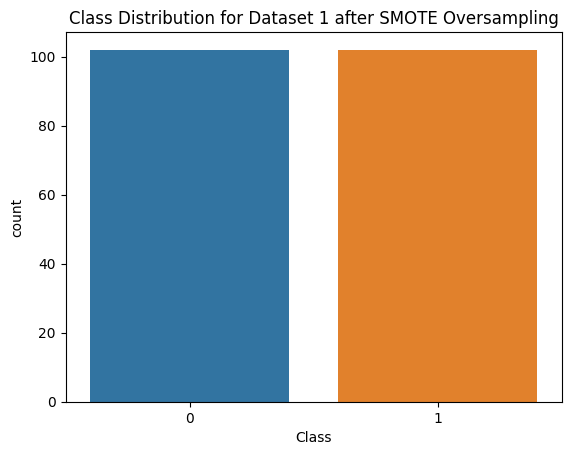

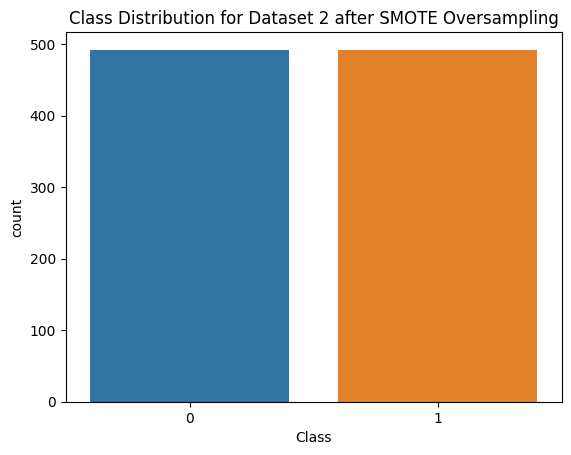

In [ ]:
for i, dataset in enumerate(undersampled_datasets, start=1):

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']



    sns.countplot(x='Class', data=dataset)

    plt.title(f'Class Distribution for Dataset {i} after SMOTE Oversampling')

    plt.show()


# **Training the DataSets**

Training above datasets one by one on RandomForest Classifier , KNN and XGBoost.

# **1. Training UnderSampled DataSets**





*   Split : Training : Test = 80:20





Training Models for Dataset 1 with Undersampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.8773
XGBoost : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.8537
Precision: 0.8824
Recall: 0.7895
F1-Score: 0.8333
ROC AUC: 0.8493


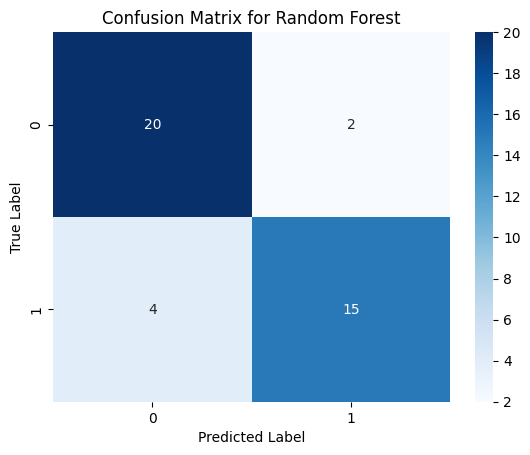

KNN:
Accuracy: 0.8293
Precision: 0.8750
Recall: 0.7368
F1-Score: 0.8000
ROC AUC: 0.8230


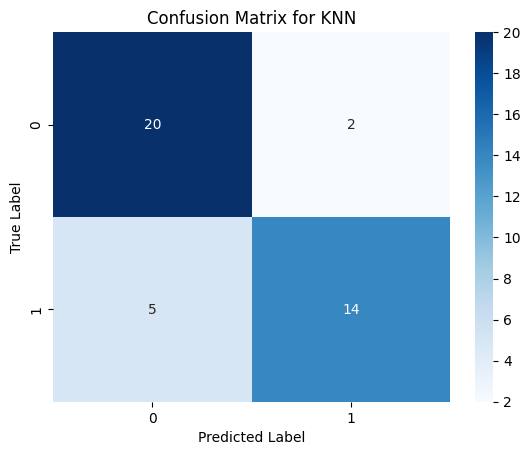

XGBoost:
Accuracy: 0.8780
Precision: 0.8500
Recall: 0.8947
F1-Score: 0.8718
ROC AUC: 0.8792


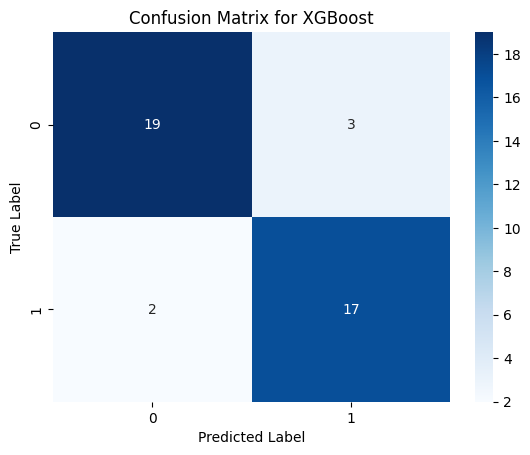

Hard Voting:
Accuracy: 0.8537
Precision: 0.8824
Recall: 0.7895
F1-Score: 0.8333
ROC AUC: 0.8493


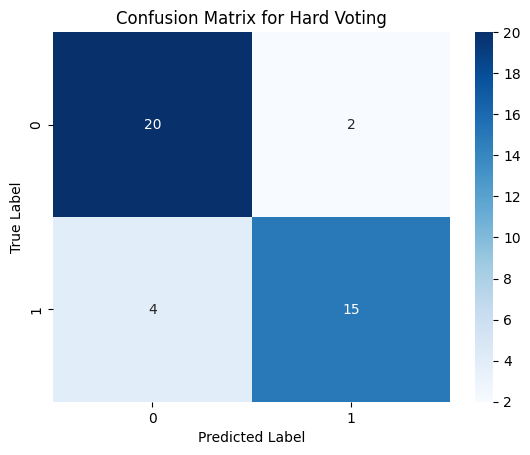

Soft Voting:
Accuracy: 0.9024
Precision: 0.8947
Recall: 0.8947
F1-Score: 0.8947
ROC AUC: 0.9019


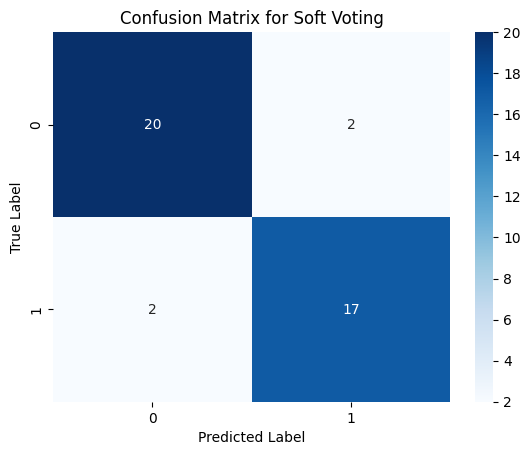

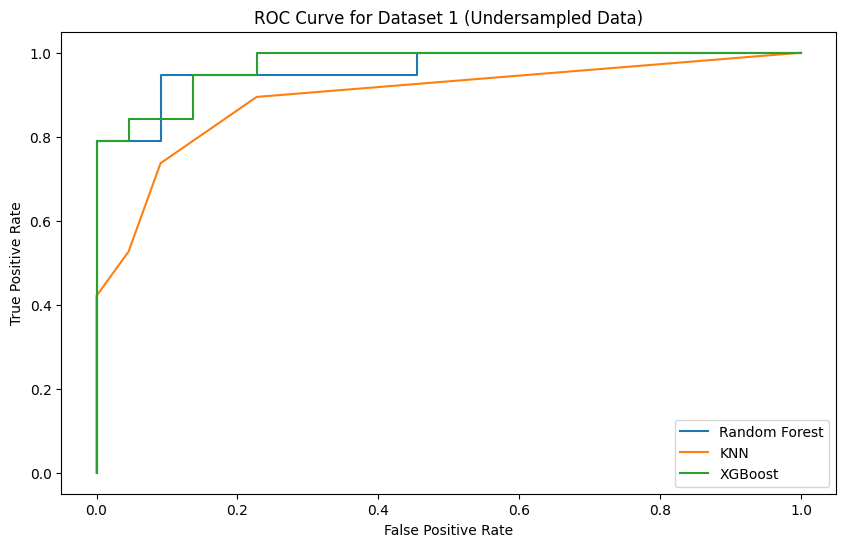


Training Models for Dataset 2 with Undersampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.7548
XGBoost : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9239
Precision: 0.9560
Recall: 0.8878
F1-Score: 0.9206
ROC AUC: 0.9237


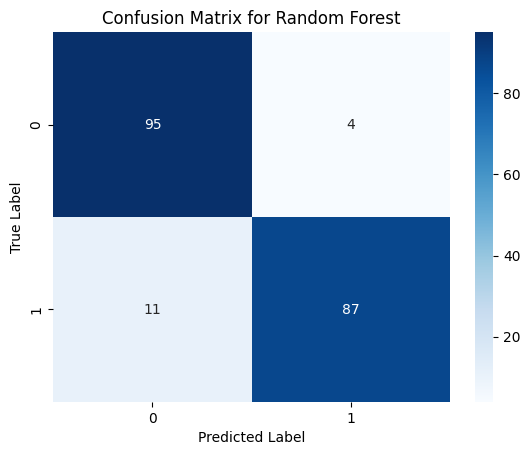

KNN:
Accuracy: 0.6548
Precision: 0.6596
Recall: 0.6327
F1-Score: 0.6458
ROC AUC: 0.6547


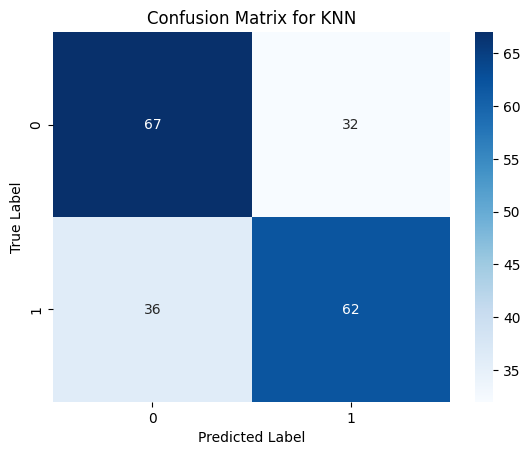

XGBoost:
Accuracy: 0.9340
Precision: 0.9570
Recall: 0.9082
F1-Score: 0.9319
ROC AUC: 0.9339


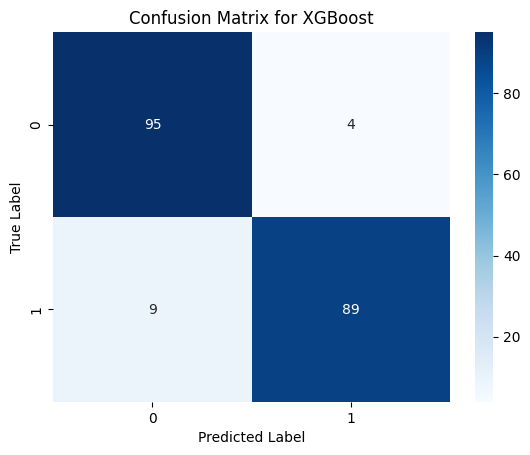

Hard Voting:
Accuracy: 0.9289
Precision: 0.9565
Recall: 0.8980
F1-Score: 0.9263
ROC AUC: 0.9288


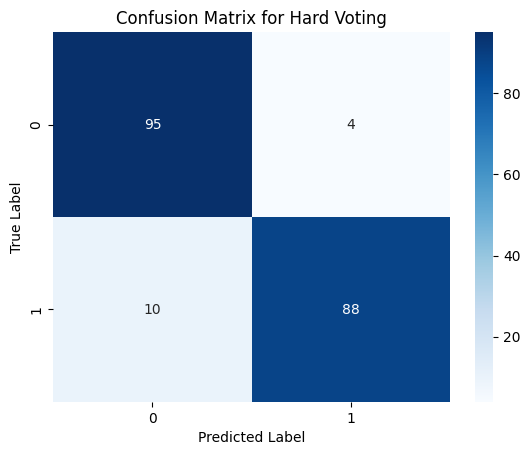

Soft Voting:
Accuracy: 0.9289
Precision: 0.9667
Recall: 0.8878
F1-Score: 0.9255
ROC AUC: 0.9287


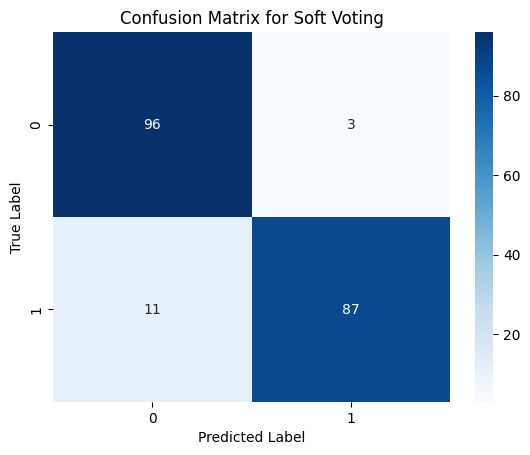

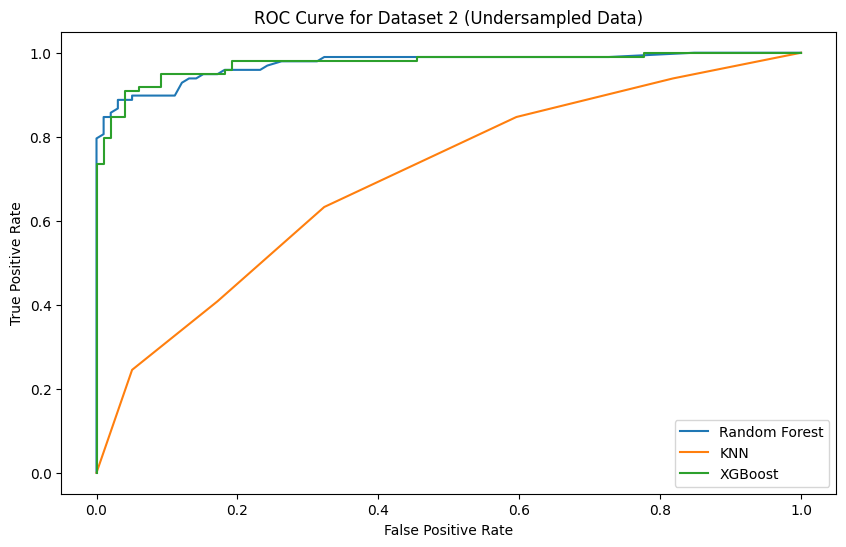

In [ ]:
# Training above Undersampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset



from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

import matplotlib.pyplot as plt



for i, dataset in enumerate(undersampled_datasets, start=1):

    print(f"\nTraining Models for Dataset {i} with Undersampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)





    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")

    print("Testing Accuracy of All models :")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Undersampled Data)')

    plt.legend()

    plt.show()


* Split : Training : Test = 70:30


Training Models for Dataset 1 with Undersampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.8662
XGBoost : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.8710
Precision: 0.9231
Recall: 0.8000
F1-Score: 0.8571
ROC AUC: 0.8688


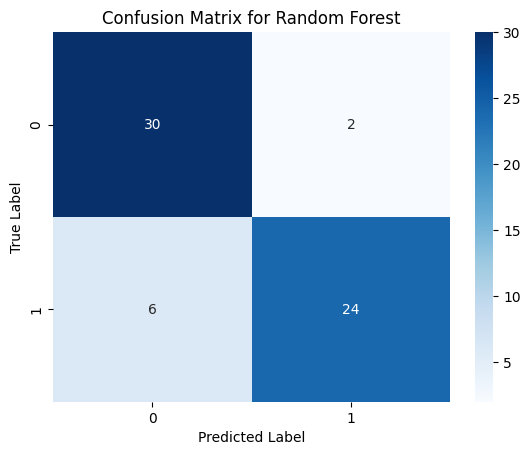

KNN:
Accuracy: 0.8548
Precision: 0.9200
Recall: 0.7667
F1-Score: 0.8364
ROC AUC: 0.8521


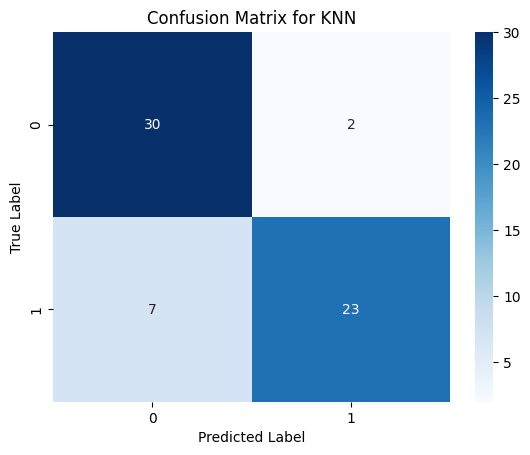

XGBoost:
Accuracy: 0.9032
Precision: 0.9000
Recall: 0.9000
F1-Score: 0.9000
ROC AUC: 0.9031


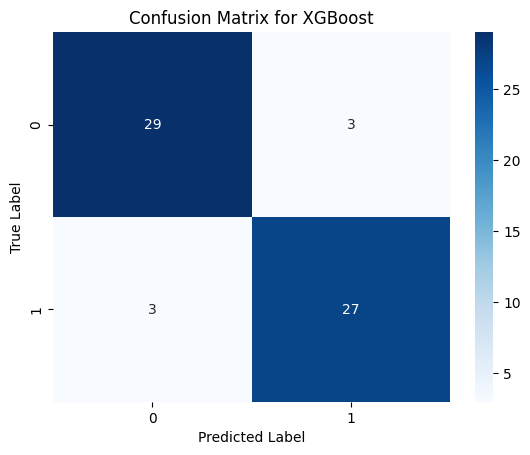

Hard Voting:
Accuracy: 0.8710
Precision: 0.9231
Recall: 0.8000
F1-Score: 0.8571
ROC AUC: 0.8688


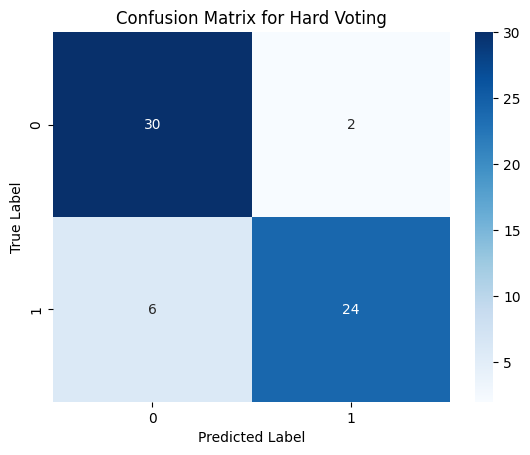

Soft Voting:
Accuracy: 0.8871
Precision: 0.9259
Recall: 0.8333
F1-Score: 0.8772
ROC AUC: 0.8854


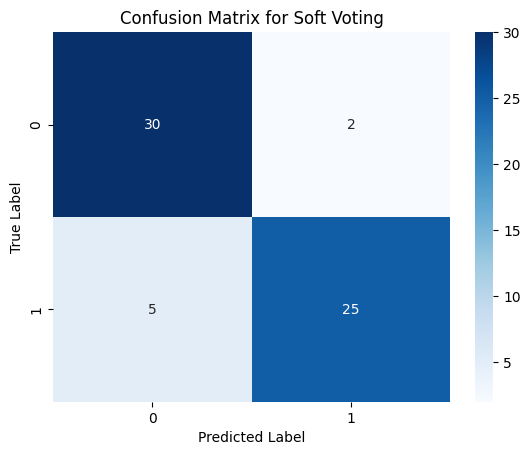

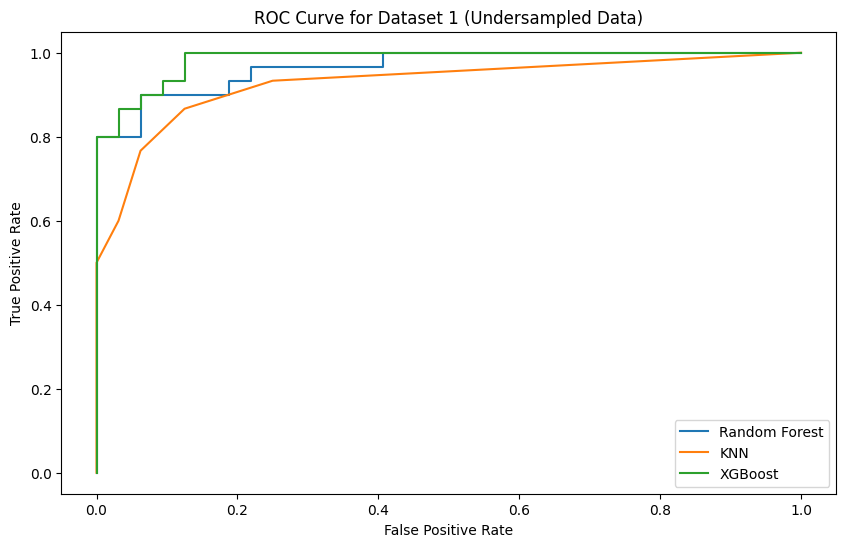


Training Models for Dataset 2 with Undersampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.7558
XGBoost : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9358
Precision: 0.9635
Recall: 0.9041
F1-Score: 0.9329
ROC AUC: 0.9354


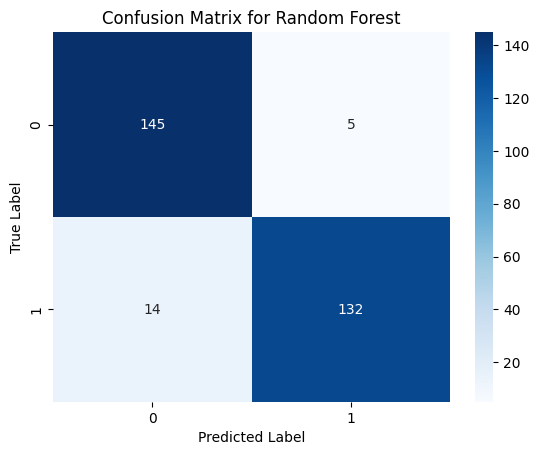

KNN:
Accuracy: 0.6318
Precision: 0.6412
Recall: 0.5753
F1-Score: 0.6065
ROC AUC: 0.6310


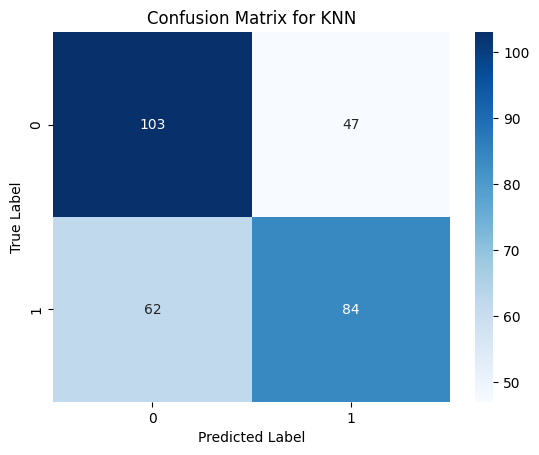

XGBoost:
Accuracy: 0.9257
Precision: 0.9493
Recall: 0.8973
F1-Score: 0.9225
ROC AUC: 0.9253


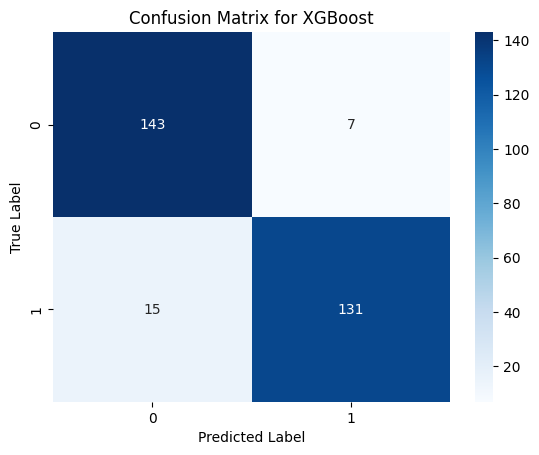

Hard Voting:
Accuracy: 0.9324
Precision: 0.9632
Recall: 0.8973
F1-Score: 0.9291
ROC AUC: 0.9320


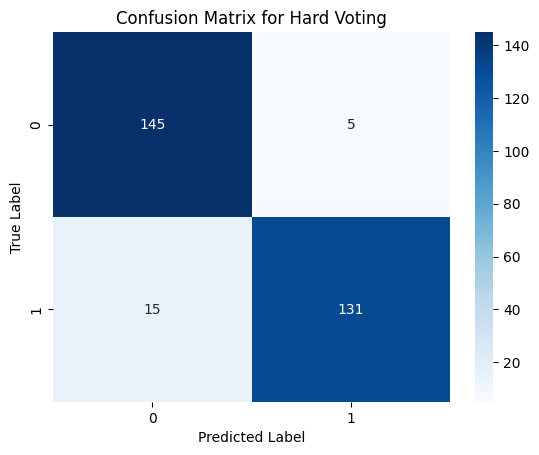

Soft Voting:
Accuracy: 0.9358
Precision: 0.9635
Recall: 0.9041
F1-Score: 0.9329
ROC AUC: 0.9354


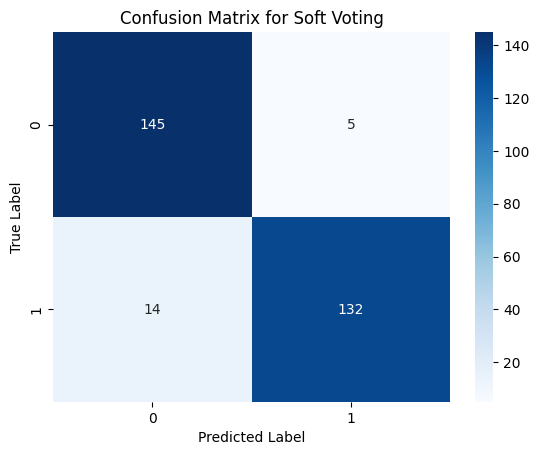

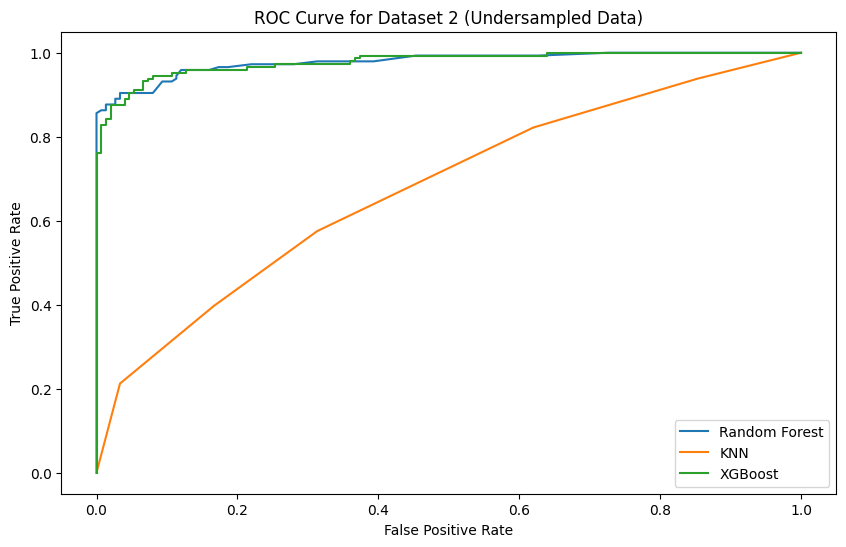

In [ ]:
# Train above Undersampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset



for i, dataset in enumerate(undersampled_datasets, start=1):

    print(f"\nTraining Models for Dataset {i} with Undersampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")

    print("Testing Accuracy of All models :")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Undersampled Data)')

    plt.legend()

    plt.show()


# **2.OverSampled DataSets**

# **RandomOverSampled Datasets**

Train Split = 80:20

Training and Evaluating on RandomOversampled Datasets

Training Models for Dataset 1 with RandomOversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9997
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC AUC: 1.0000


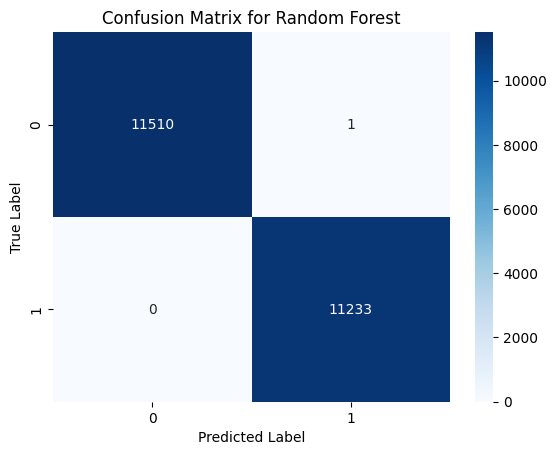

KNN:
Accuracy: 0.9994
Precision: 0.9988
Recall: 1.0000
F1-Score: 0.9994
ROC AUC: 0.9994


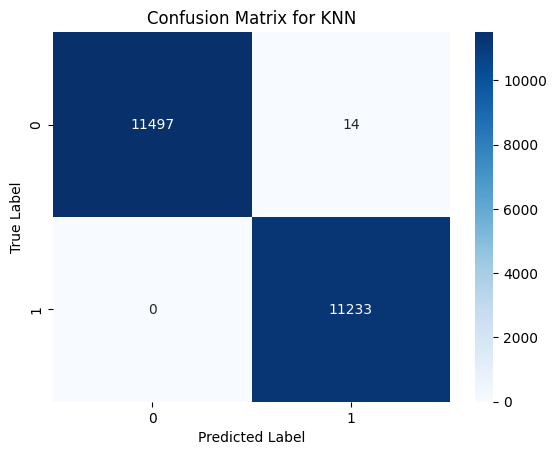

XGBoost:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


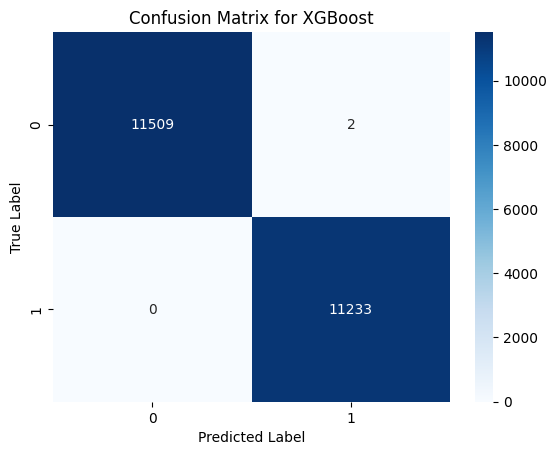

Hard Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


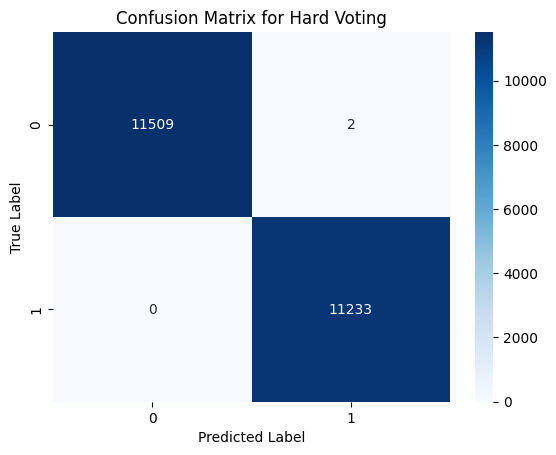

Soft Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


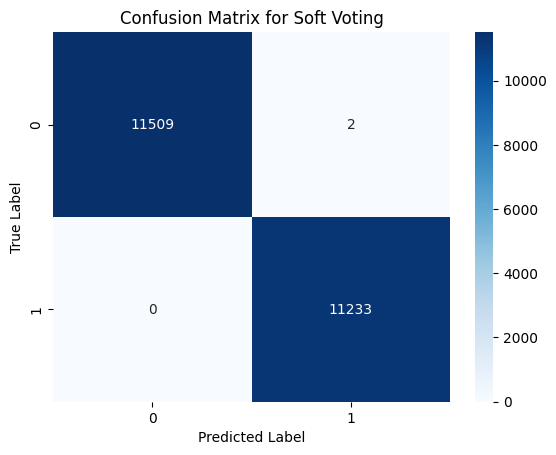

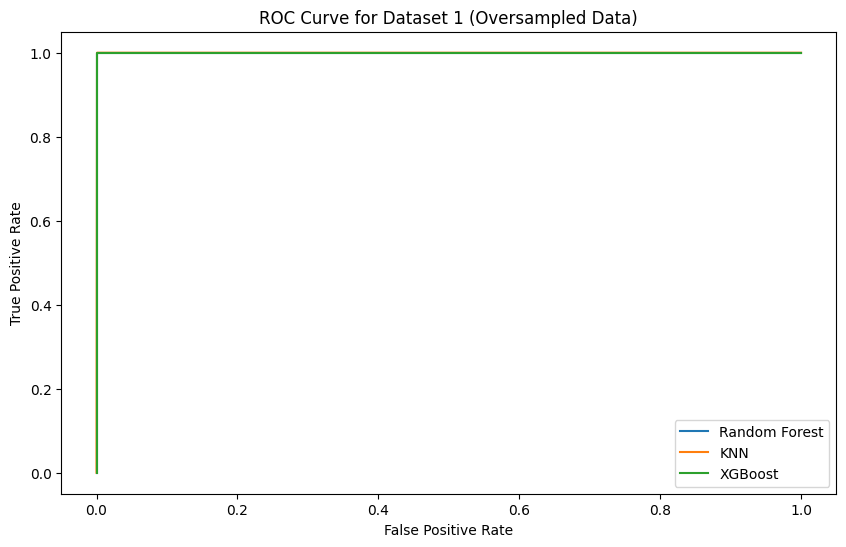


Training Models for Dataset 2 with RandomOversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9994
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC AUC: 1.0000


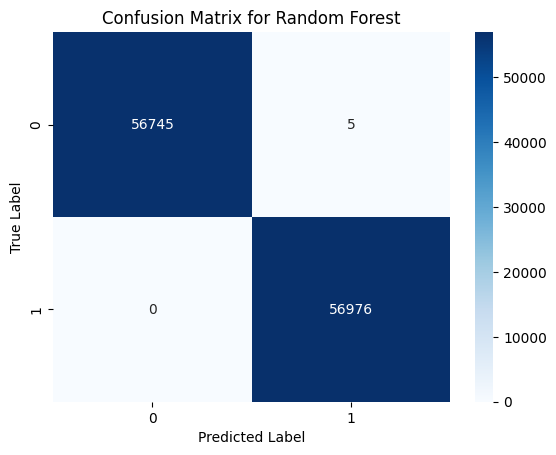

KNN:
Accuracy: 0.9990
Precision: 0.9979
Recall: 1.0000
F1-Score: 0.9990
ROC AUC: 0.9990


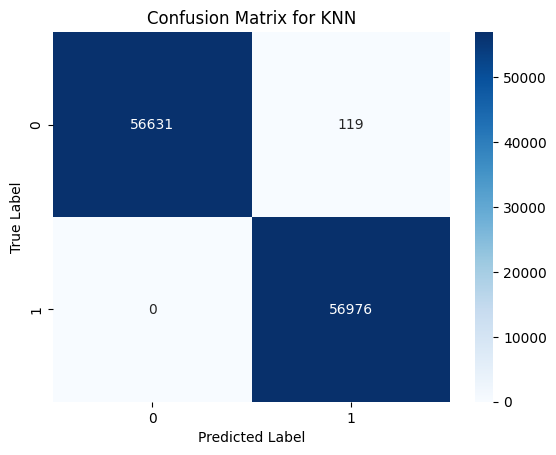

XGBoost:
Accuracy: 0.9999
Precision: 0.9999
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


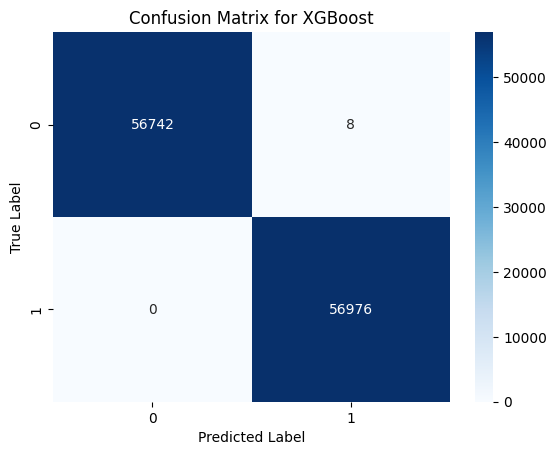

Hard Voting:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC AUC: 1.0000


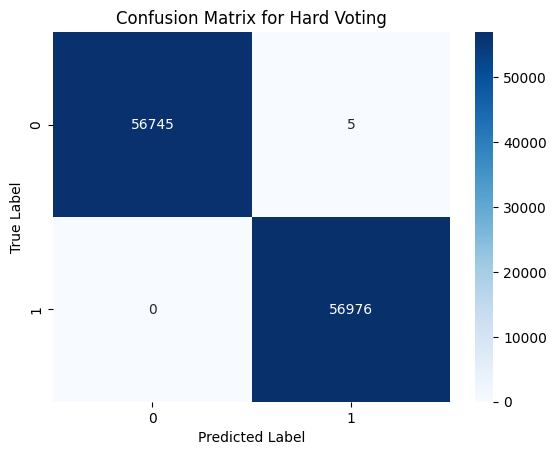

Soft Voting:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC AUC: 1.0000


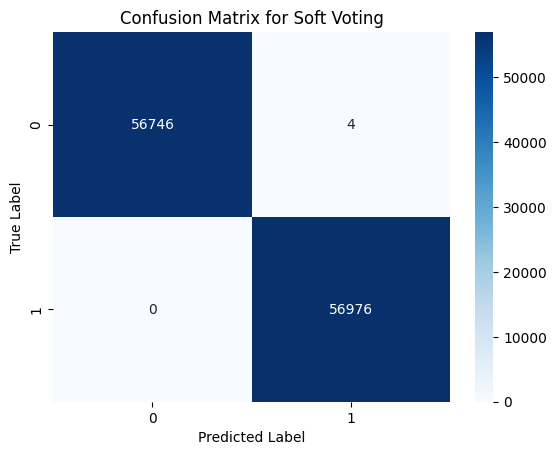

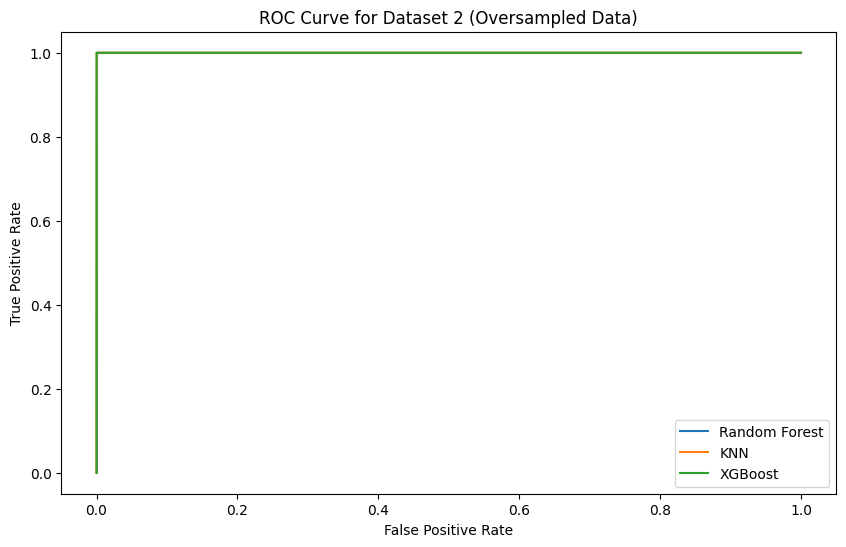

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

import matplotlib.pyplot as plt

print("Training and Evaluating on RandomOversampled Datasets")

for i, dataset in enumerate(oversampled_datasets1, start=1):

    print(f"\nTraining Models for Dataset {i} with RandomOversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


Split : Train : Test = 70:30


Training Models for Dataset 1 with RandomOversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9997
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


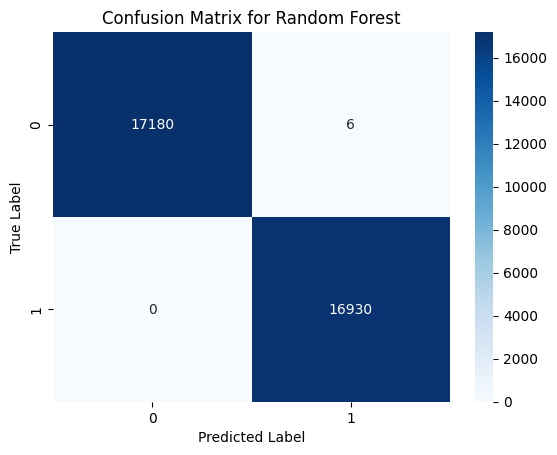

KNN:
Accuracy: 0.9994
Precision: 0.9988
Recall: 1.0000
F1-Score: 0.9994
ROC AUC: 0.9994


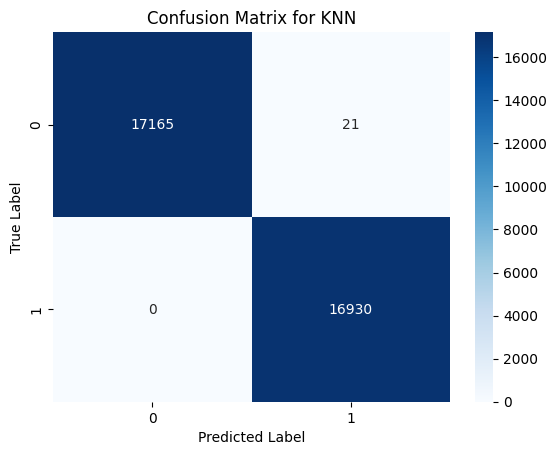

XGBoost:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


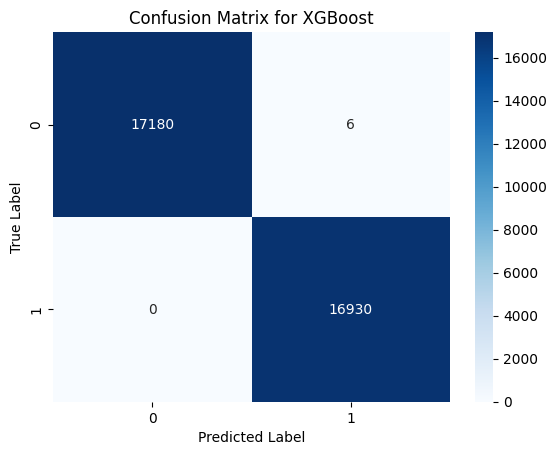

Hard Voting:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


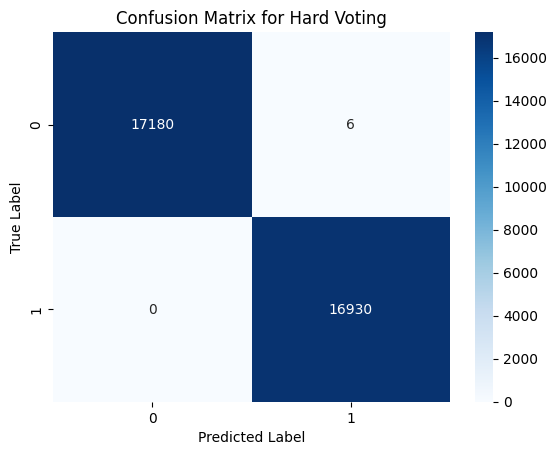

Soft Voting:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


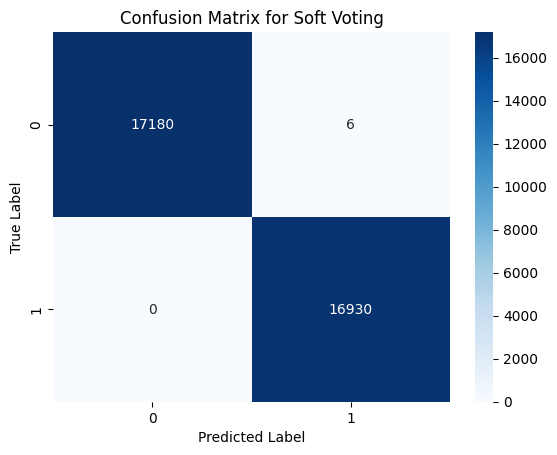

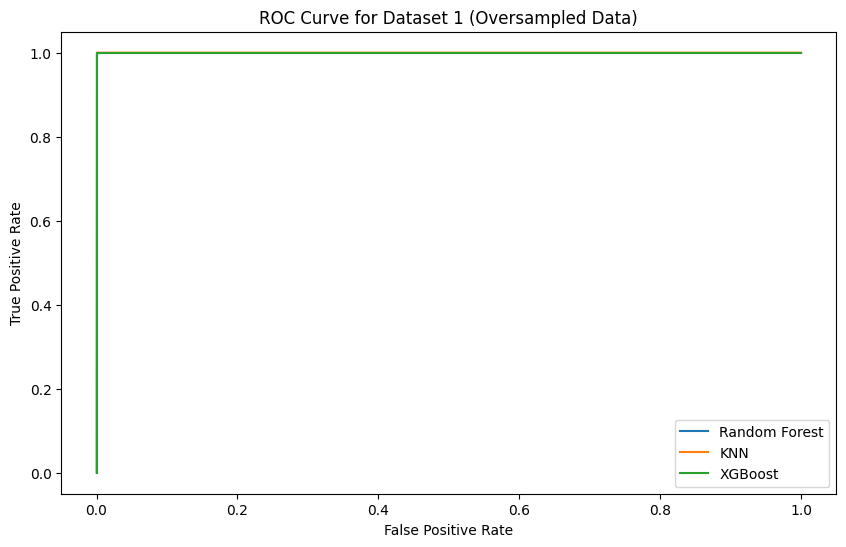


Training Models for Dataset 2 with RandomOversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9993
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC AUC: 1.0000


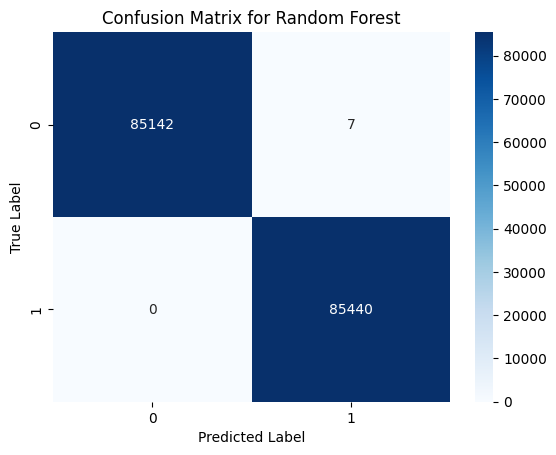

KNN:
Accuracy: 0.9989
Precision: 0.9978
Recall: 1.0000
F1-Score: 0.9989
ROC AUC: 0.9989


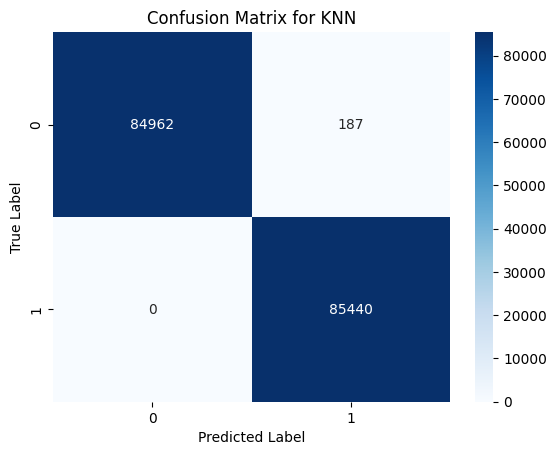

XGBoost:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


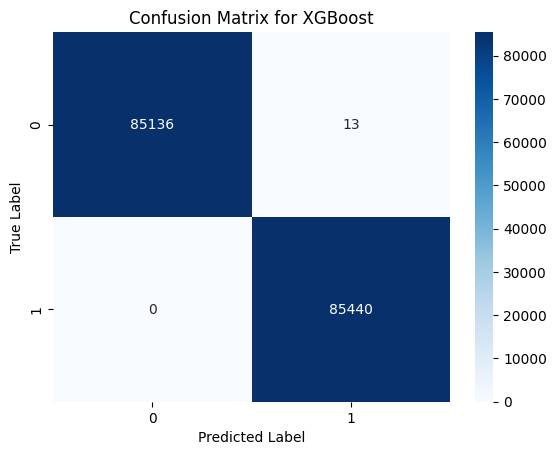

Hard Voting:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC AUC: 1.0000


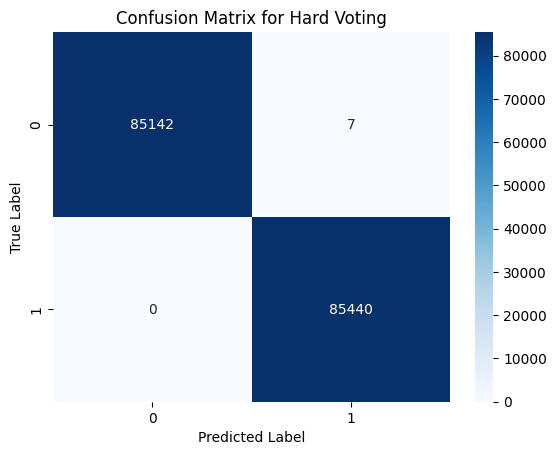

Soft Voting:
Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1-Score: 1.0000
ROC AUC: 1.0000


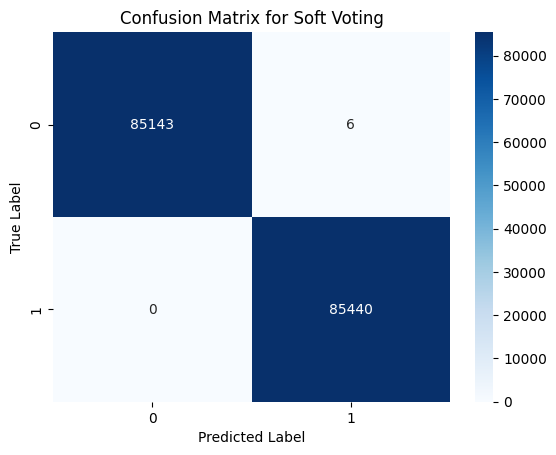

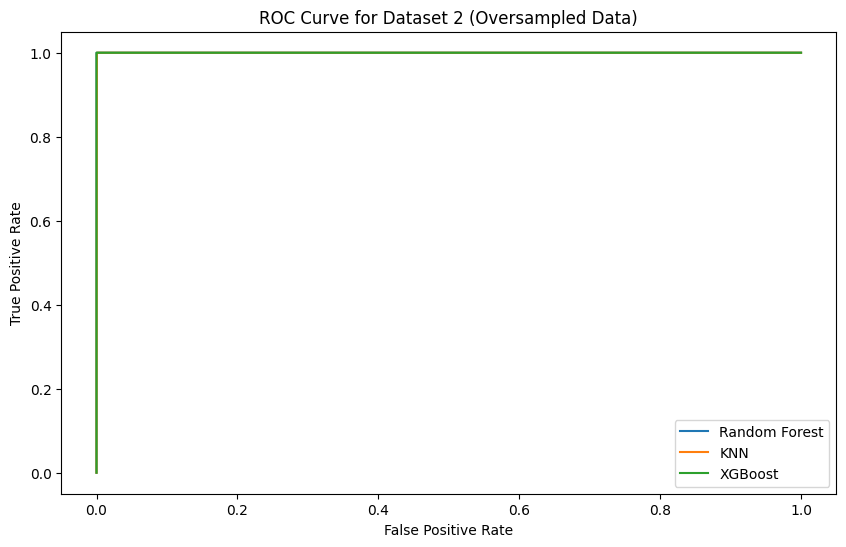

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset


for i, dataset in enumerate(oversampled_datasets1, start=1):

    print(f"\nTraining Models for Dataset {i} with RandomOversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


# **ADASYN Oversampled Datasets**

* Split = 80:20

Training and Evaluating on ADASYN Oversampled Datasets

Training Models for Dataset 1 with ADASYN Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9972
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


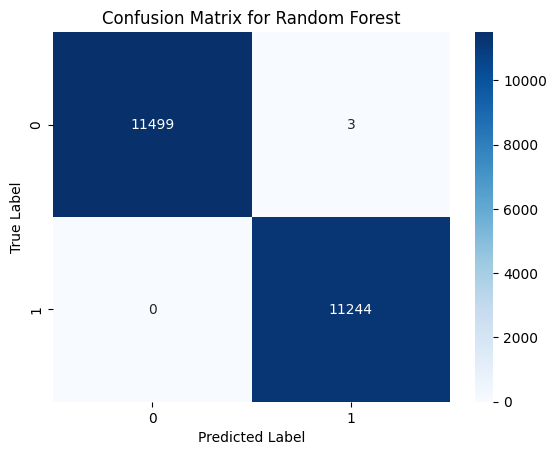

KNN:
Accuracy: 0.9956
Precision: 0.9913
Recall: 1.0000
F1-Score: 0.9956
ROC AUC: 0.9957


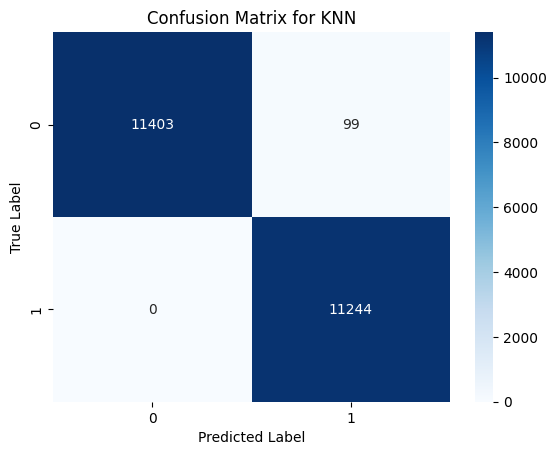

XGBoost:
Accuracy: 0.9996
Precision: 0.9993
Recall: 1.0000
F1-Score: 0.9996
ROC AUC: 0.9997


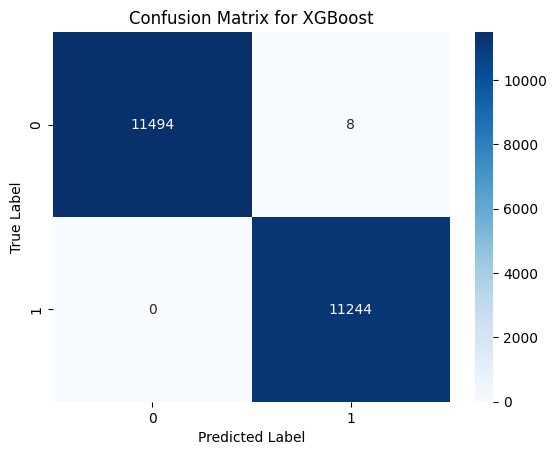

Hard Voting:
Accuracy: 0.9997
Precision: 0.9995
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


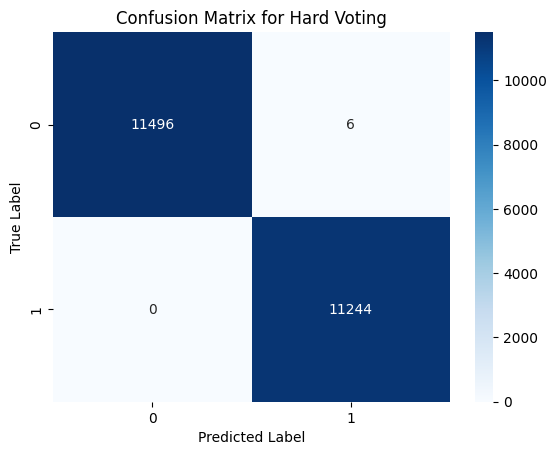

Soft Voting:
Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


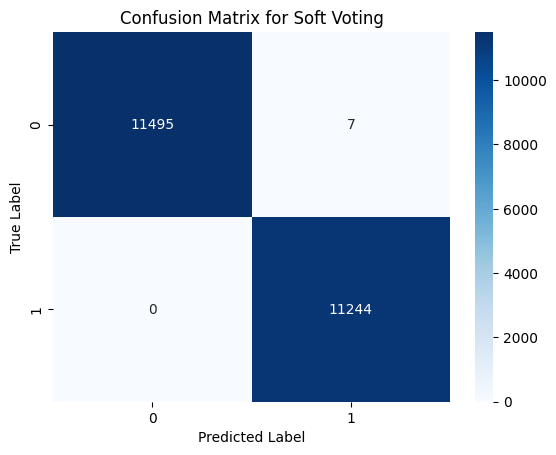

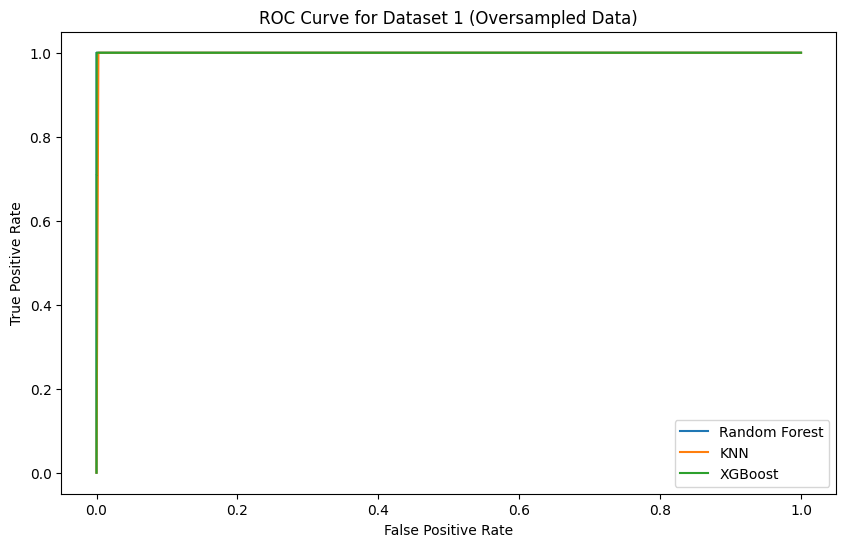


Training Models for Dataset 2 with ADASYN Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9758
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


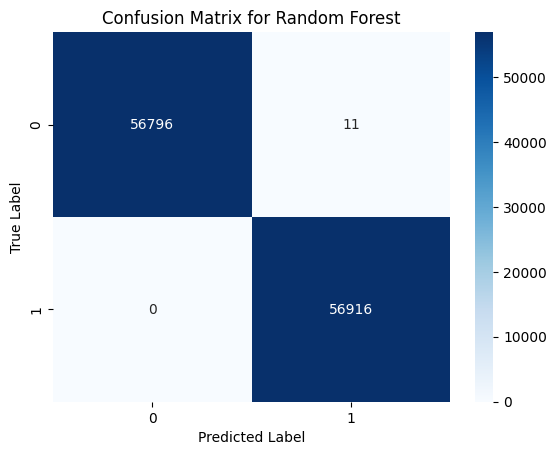

KNN:
Accuracy: 0.9634
Precision: 0.9493
Recall: 0.9791
F1-Score: 0.9640
ROC AUC: 0.9634


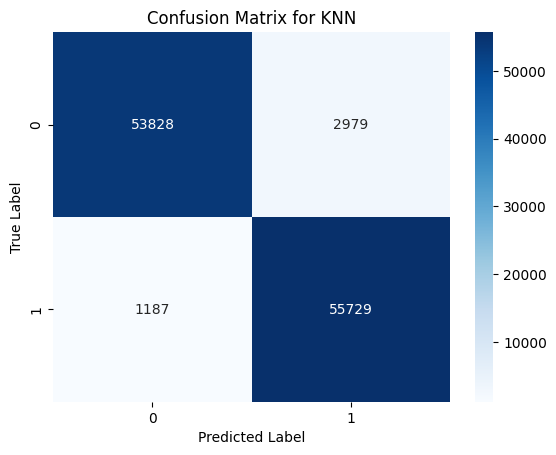

XGBoost:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


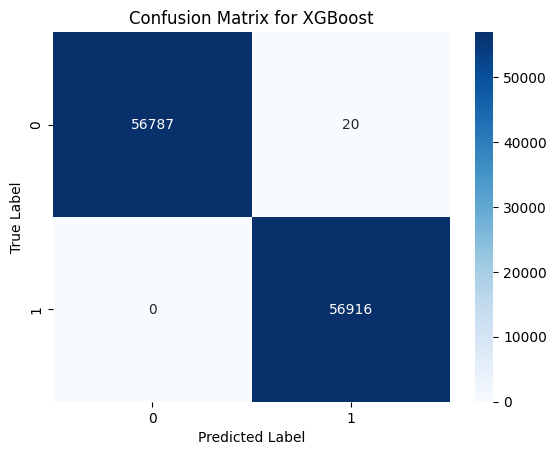

Hard Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


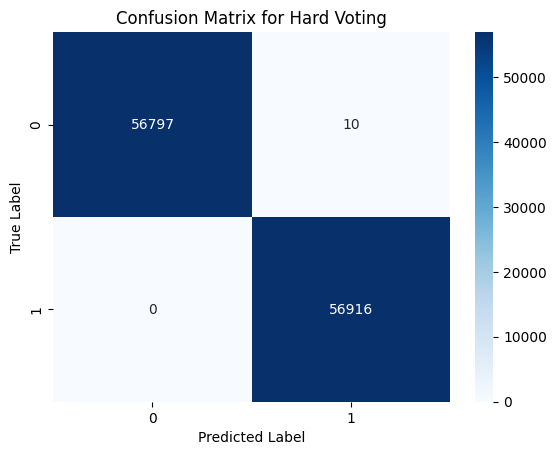

Soft Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


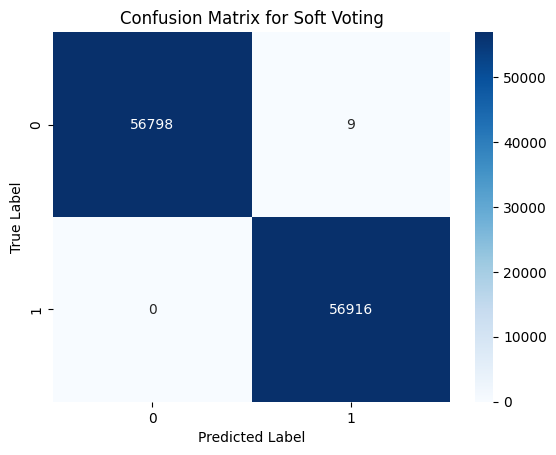

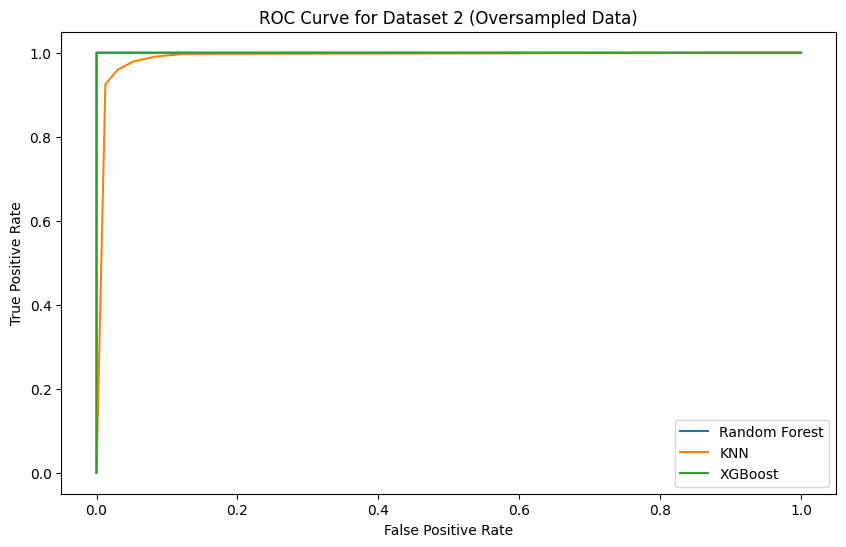

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset

print("Training and Evaluating on ADASYN Oversampled Datasets")

for i, dataset in enumerate(oversampled_datasets2, start=1):

    print(f"\nTraining Models for Dataset {i} with ADASYN Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


* Split = 70:30


Training Models for Dataset 1 with ADASYN Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9968
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


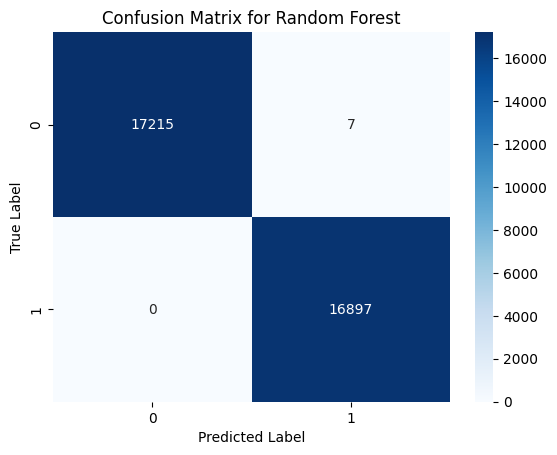

KNN:
Accuracy: 0.9954
Precision: 0.9909
Recall: 1.0000
F1-Score: 0.9954
ROC AUC: 0.9955


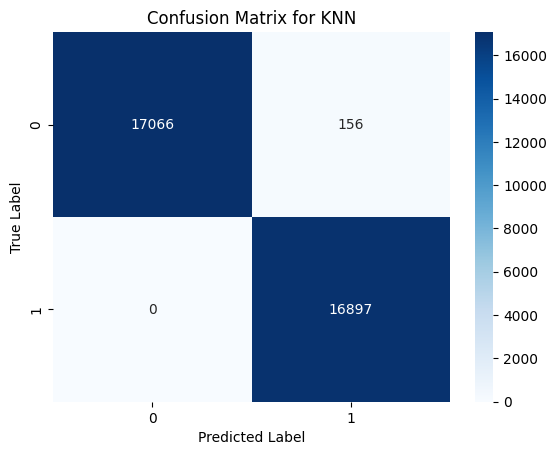

XGBoost:
Accuracy: 0.9997
Precision: 0.9993
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


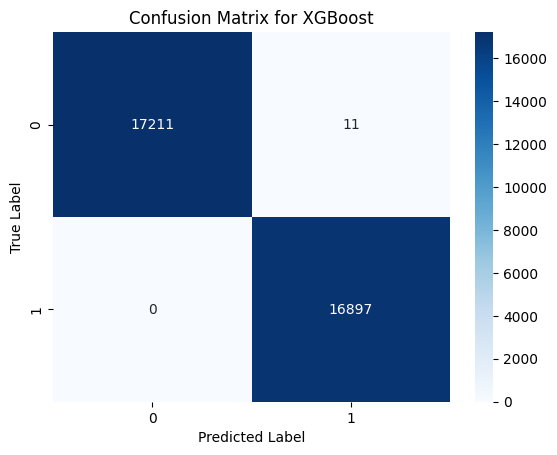

Hard Voting:
Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


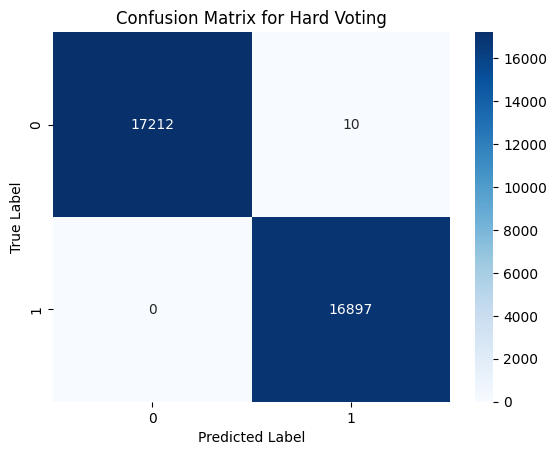

Soft Voting:
Accuracy: 0.9997
Precision: 0.9993
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


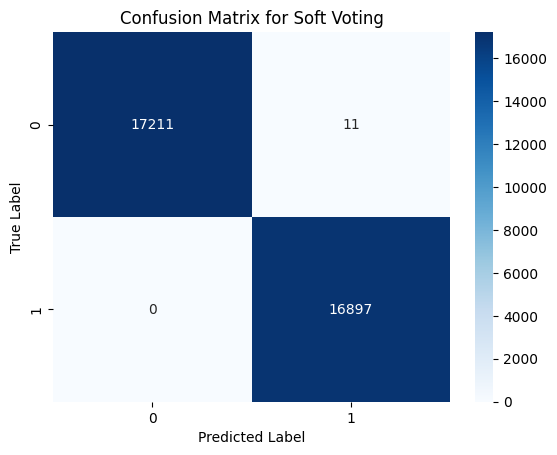

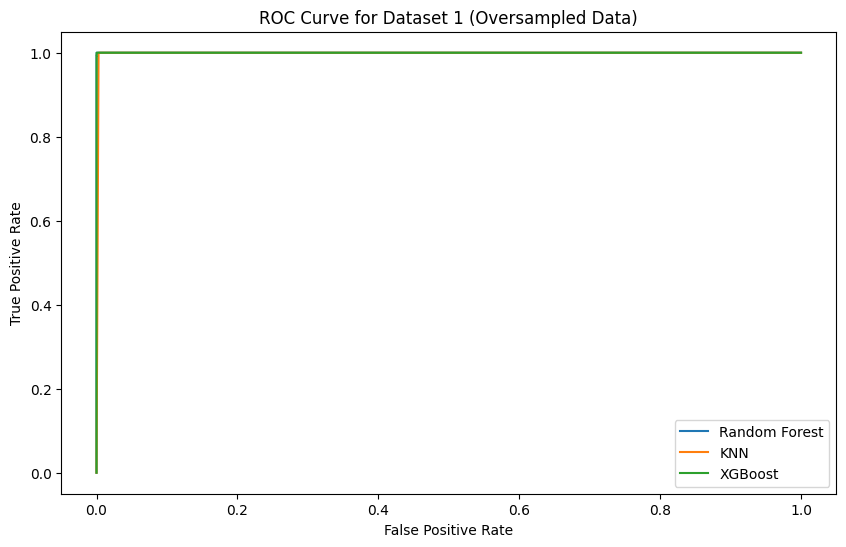


Training Models for Dataset 2 with ADASYN Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9736
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


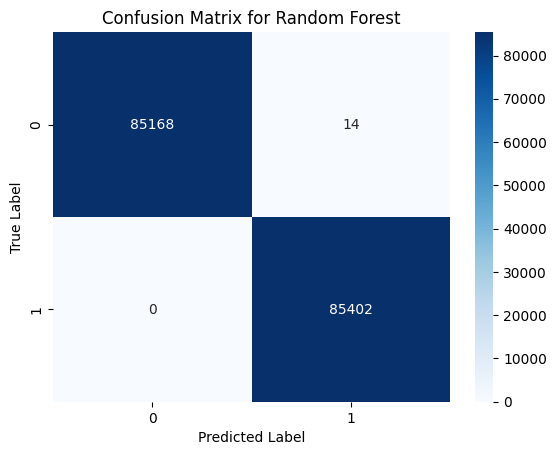

KNN:
Accuracy: 0.9592
Precision: 0.9445
Recall: 0.9757
F1-Score: 0.9599
ROC AUC: 0.9591


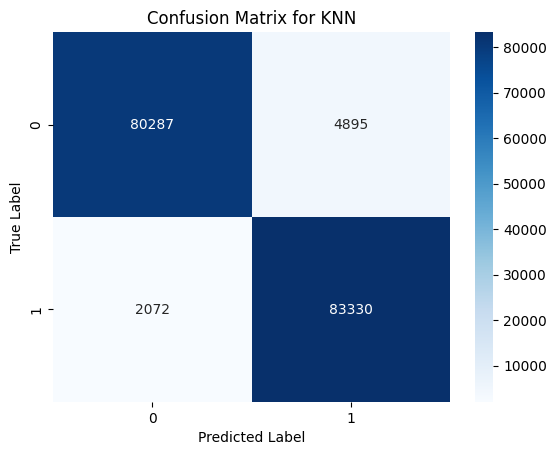

XGBoost:
Accuracy: 0.9998
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


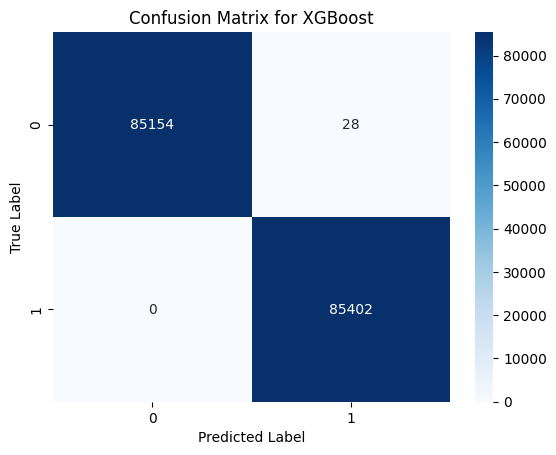

Hard Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


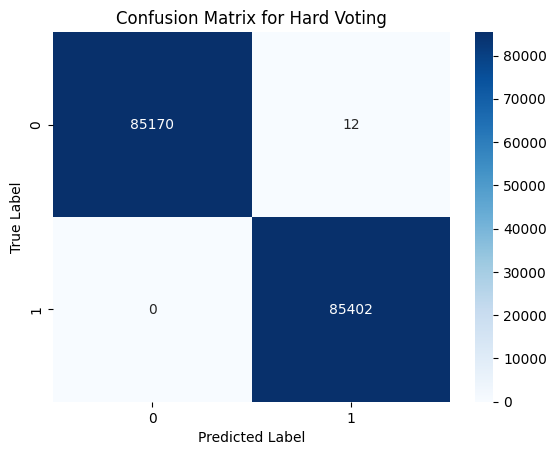

Soft Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


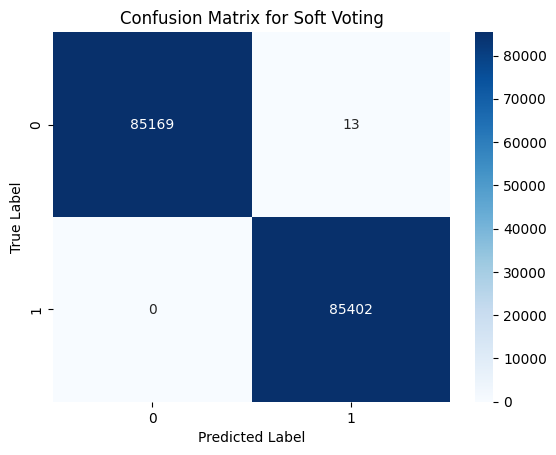

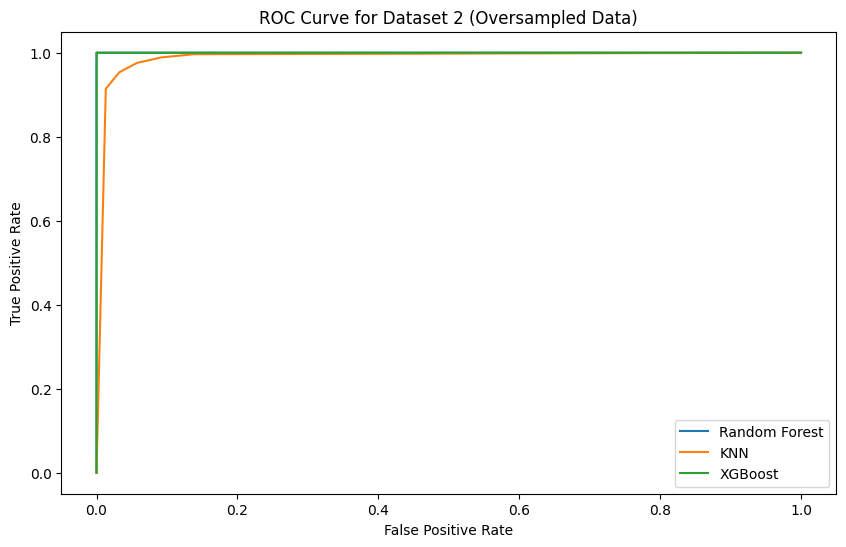

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset


for i, dataset in enumerate(oversampled_datasets2, start=1):

    print(f"\nTraining Models for Dataset {i} with ADASYN Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


# **SMOTE Oversampled Datasets**

1. * **Split** : Train : Test = 80:20


Training Models for Dataset 1 with Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9975
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


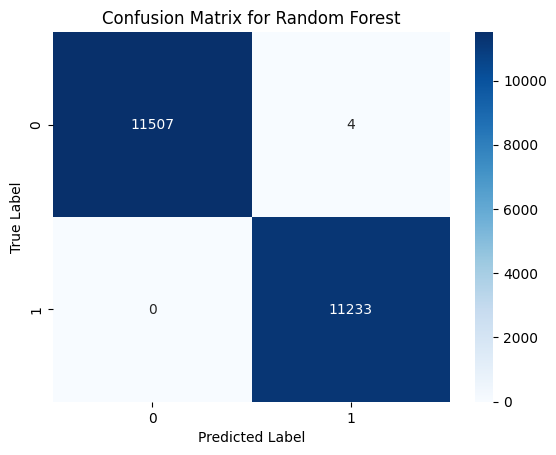

KNN:
Accuracy: 0.9962
Precision: 0.9923
Recall: 1.0000
F1-Score: 0.9961
ROC AUC: 0.9962


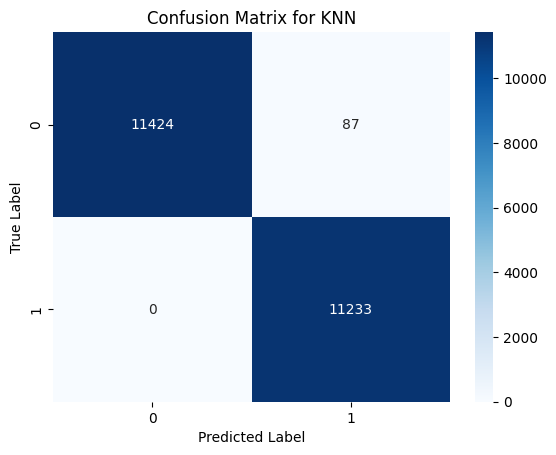

XGBoost:
Accuracy: 0.9997
Precision: 0.9995
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


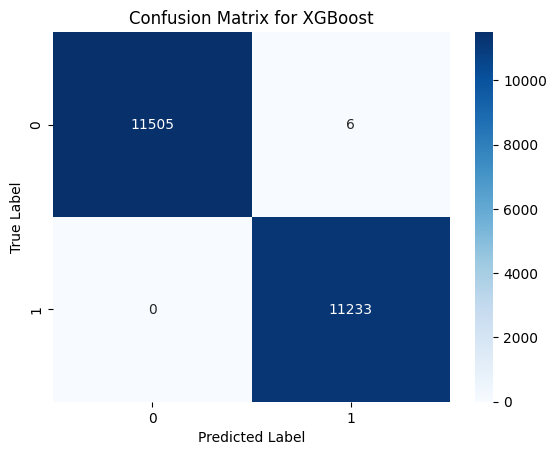

Hard Voting:
Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


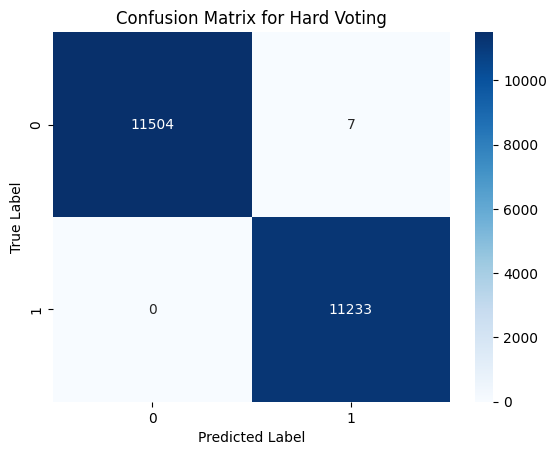

Soft Voting:
Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


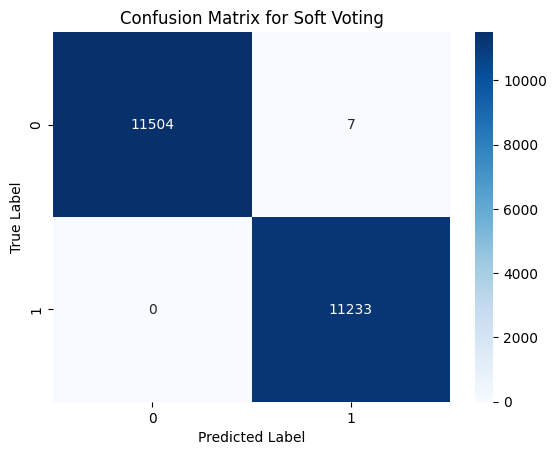

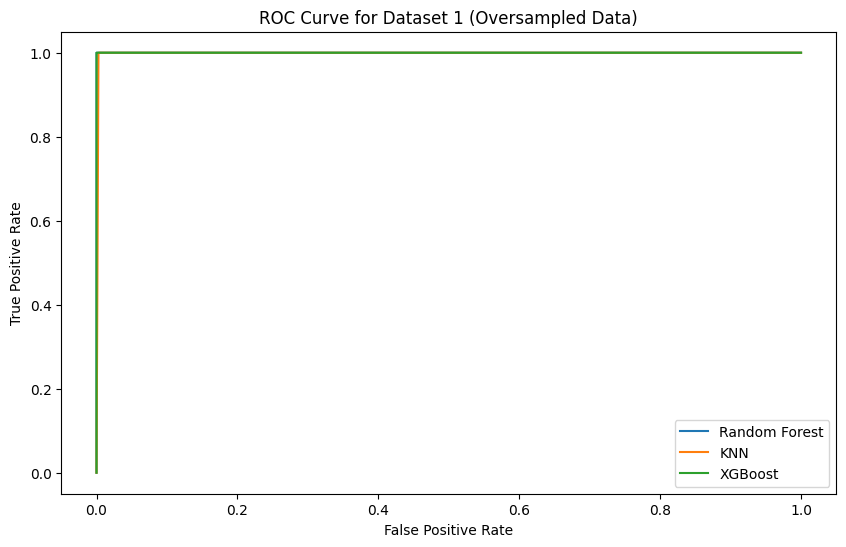


Training Models for Dataset 2 with Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9764
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


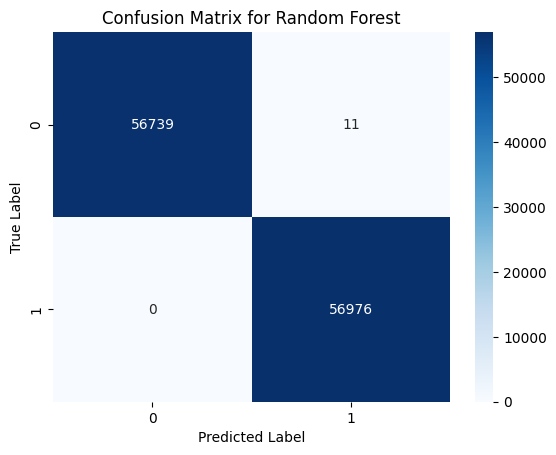

KNN:
Accuracy: 0.9631
Precision: 0.9504
Recall: 0.9774
F1-Score: 0.9637
ROC AUC: 0.9630


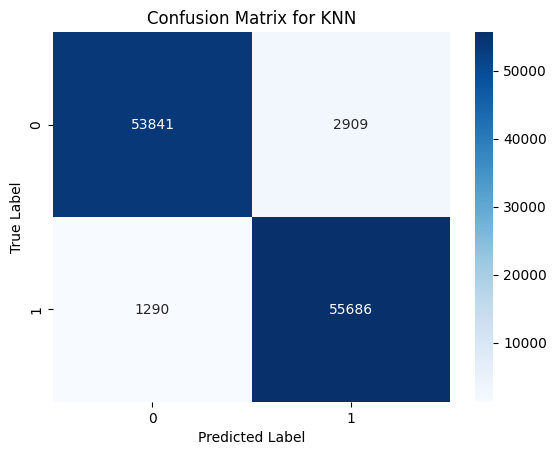

XGBoost:
Accuracy: 0.9998
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


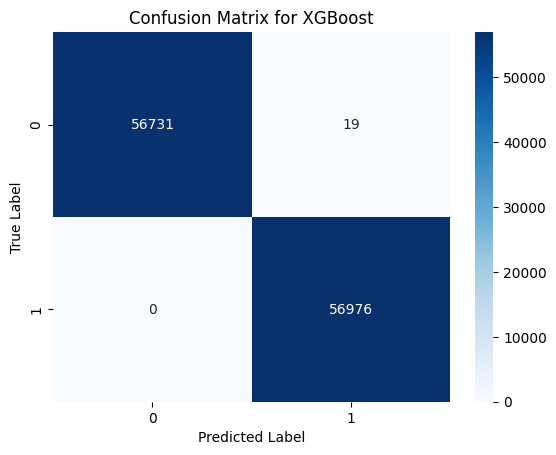

Hard Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


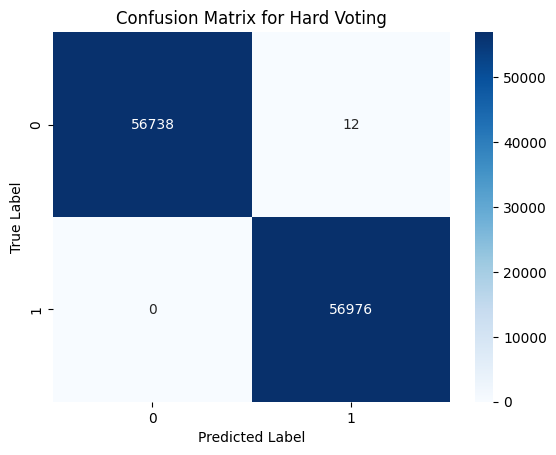

Soft Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


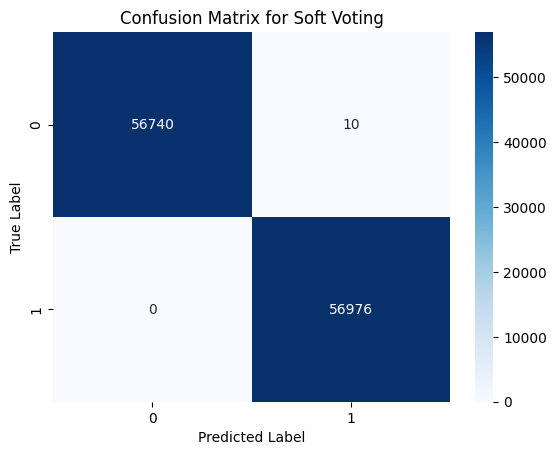

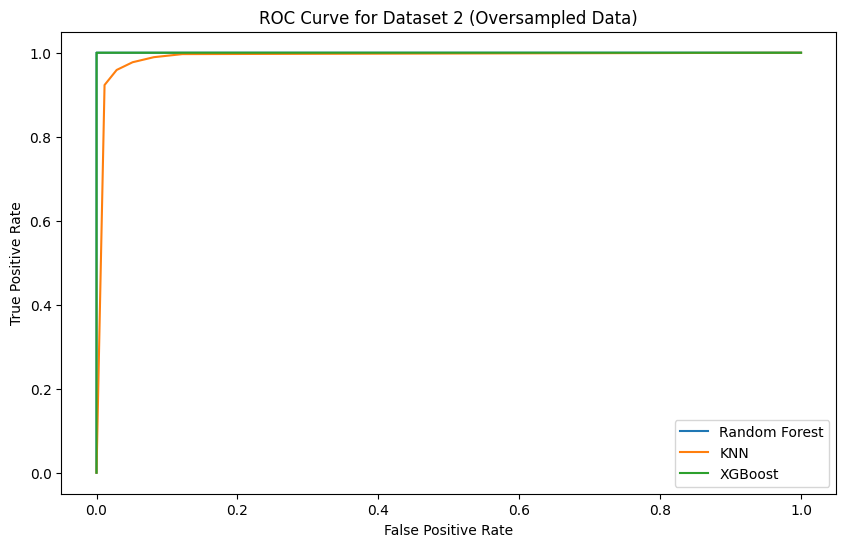

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset


print("Training and Evaluating on SMOTE OverSampled Datasets")

for i, dataset in enumerate(oversampled_datasets3, start=1):

    print(f"\nTraining Models for Dataset {i} with Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


* **Split** : Train : Test = 70:30


Training Models for Dataset 1 with Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9971
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9998
Precision: 0.9996
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


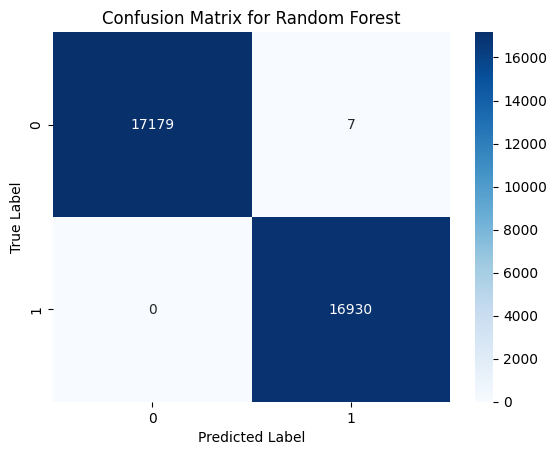

KNN:
Accuracy: 0.9960
Precision: 0.9919
Recall: 1.0000
F1-Score: 0.9959
ROC AUC: 0.9960


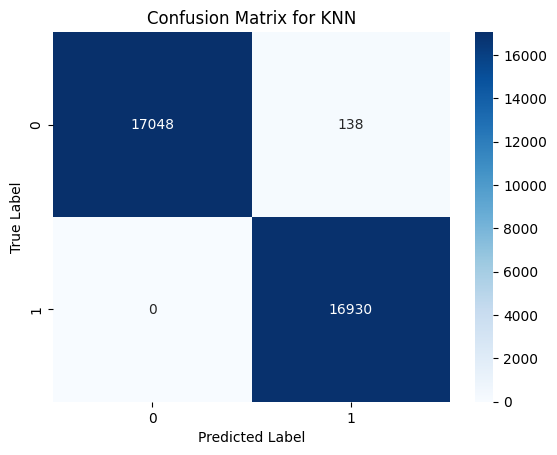

XGBoost:
Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


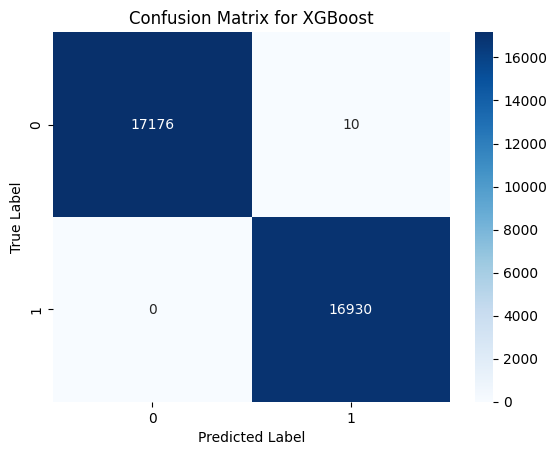

Hard Voting:
Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


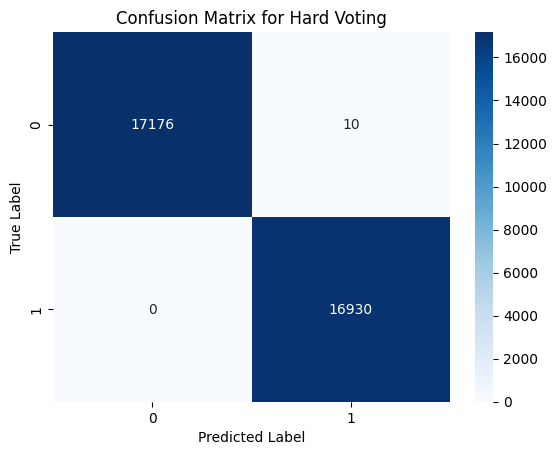

Soft Voting:
Accuracy: 0.9997
Precision: 0.9994
Recall: 1.0000
F1-Score: 0.9997
ROC AUC: 0.9997


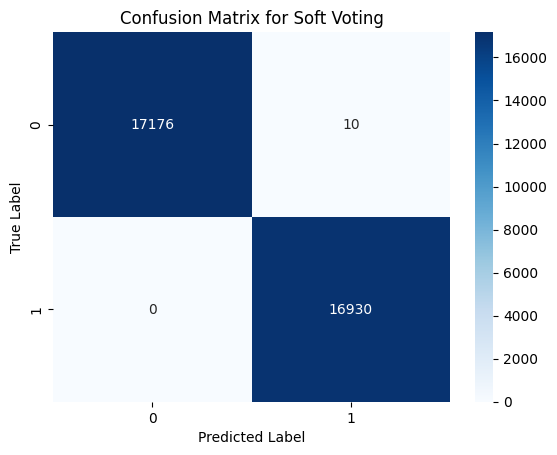

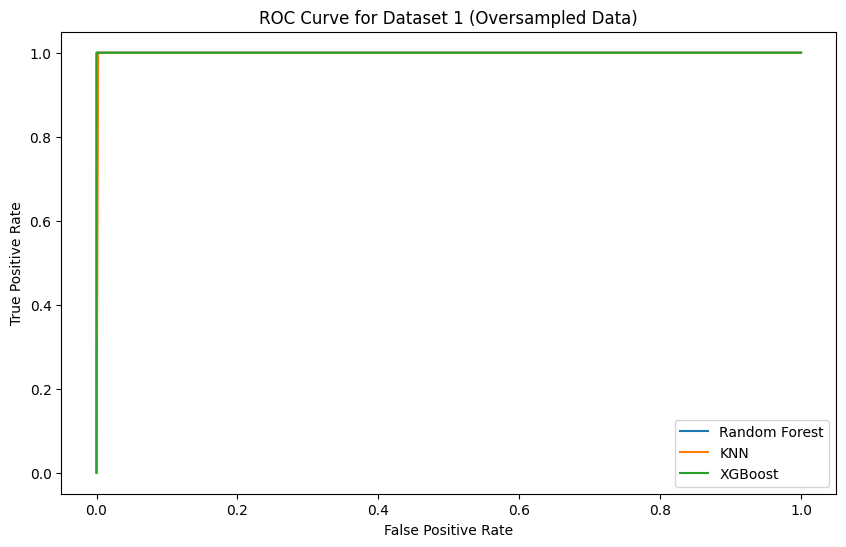


Training Models for Dataset 2 with Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9741
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


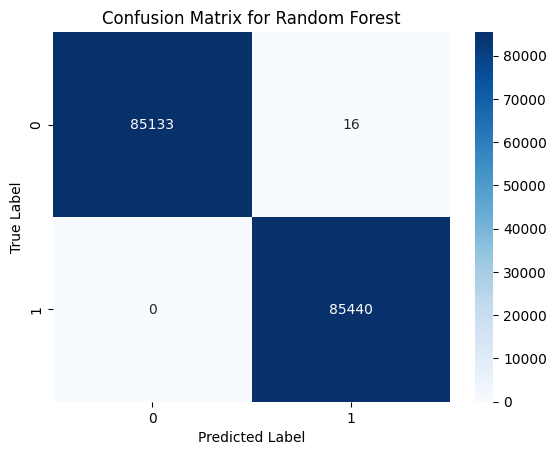

KNN:
Accuracy: 0.9592
Precision: 0.9460
Recall: 0.9741
F1-Score: 0.9598
ROC AUC: 0.9591


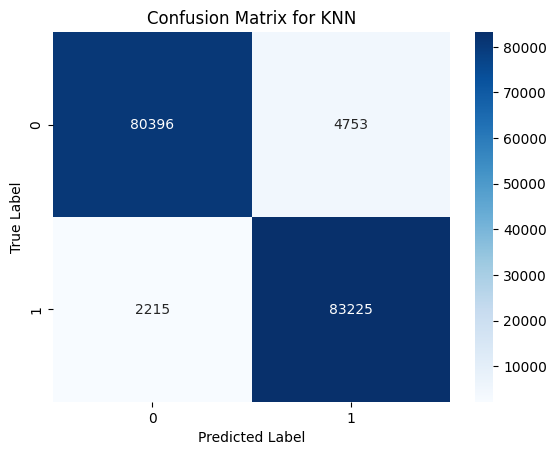

XGBoost:
Accuracy: 0.9998
Precision: 0.9997
Recall: 1.0000
F1-Score: 0.9998
ROC AUC: 0.9998


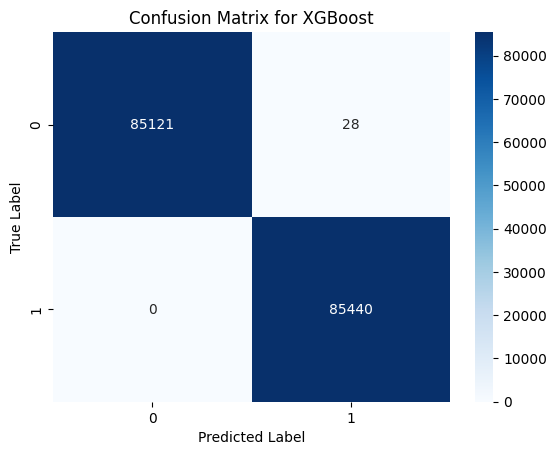

Hard Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


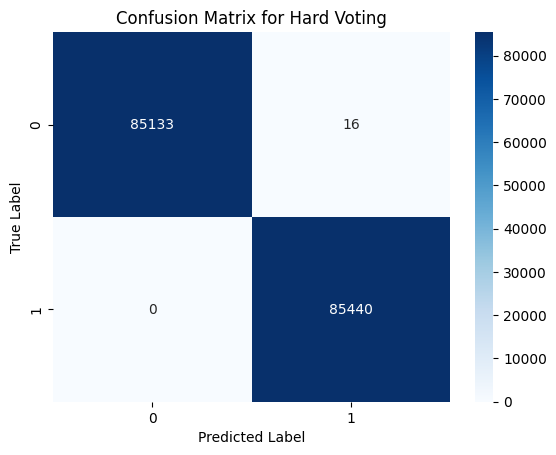

Soft Voting:
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC AUC: 0.9999


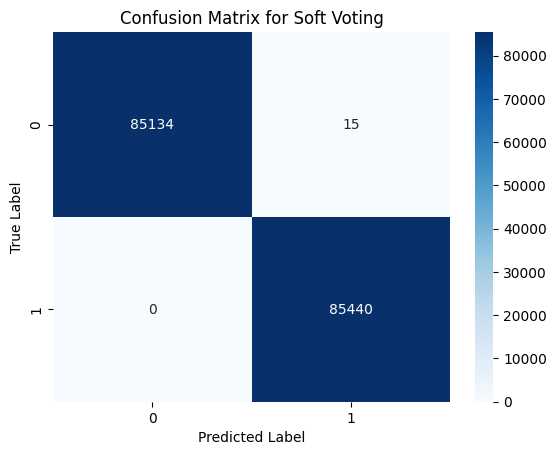

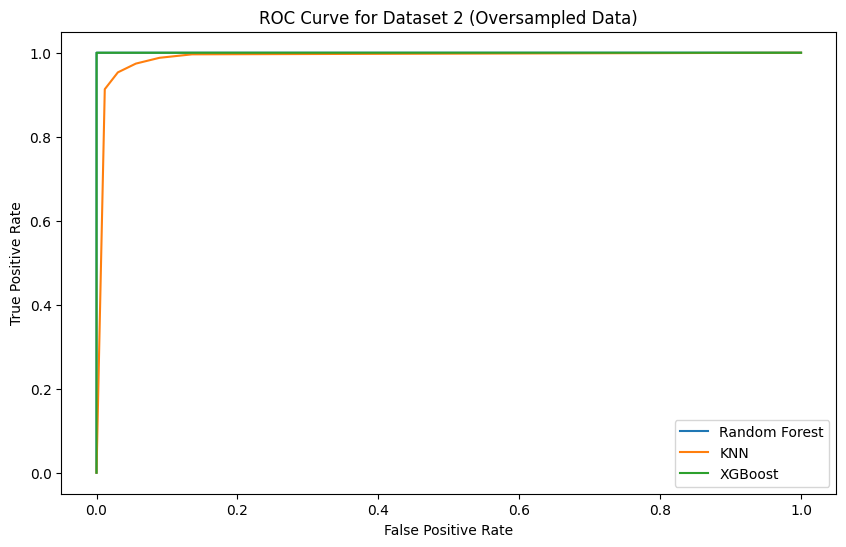

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset



for i, dataset in enumerate(oversampled_datasets3, start=1):

    print(f"\nTraining Models for Dataset {i} with Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


# **BorderlineSMOTE Oversampled**

* Split : 80:20

Training and Evaluating on BorderlineSMOTE OverSampled Datasets

Training Models for Dataset 1 with Borderline SMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9994
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9997
Precision: 0.9996
Recall: 0.9997
F1-Score: 0.9997
ROC AUC: 0.9997


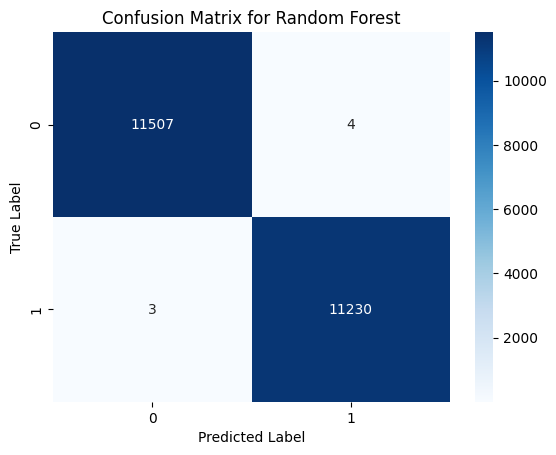

KNN:
Accuracy: 0.9986
Precision: 0.9975
Recall: 0.9996
F1-Score: 0.9986
ROC AUC: 0.9986


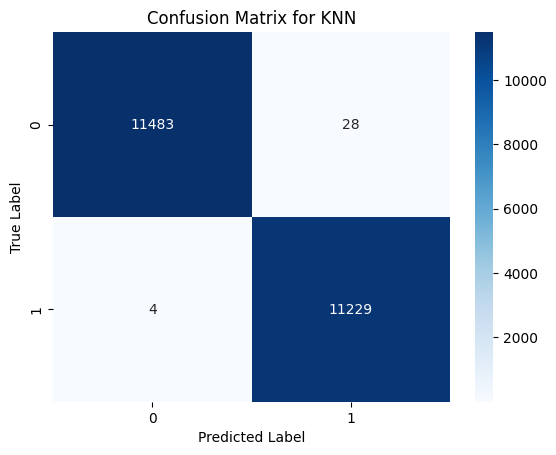

XGBoost:
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9997
F1-Score: 0.9996
ROC AUC: 0.9996


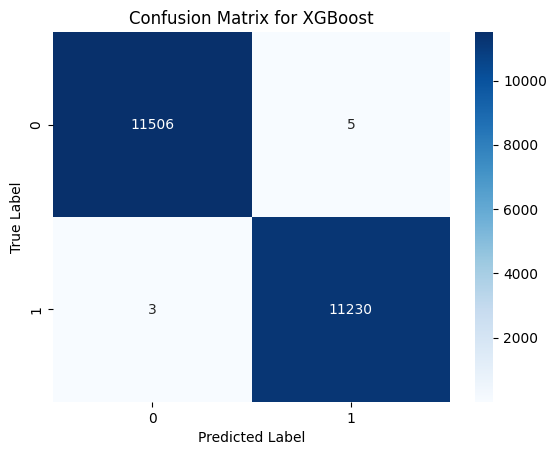

Hard Voting:
Accuracy: 0.9996
Precision: 0.9995
Recall: 0.9997
F1-Score: 0.9996
ROC AUC: 0.9996


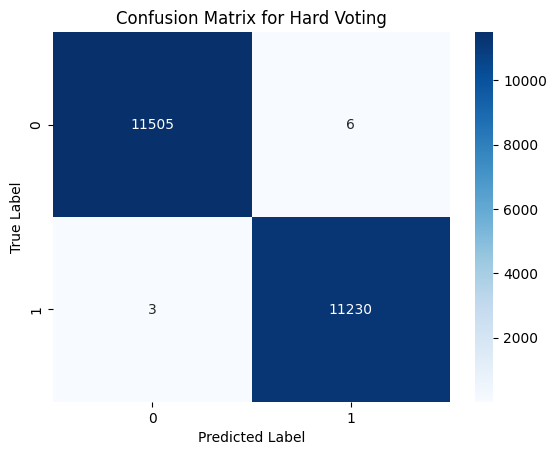

Soft Voting:
Accuracy: 0.9996
Precision: 0.9994
Recall: 0.9997
F1-Score: 0.9996
ROC AUC: 0.9996


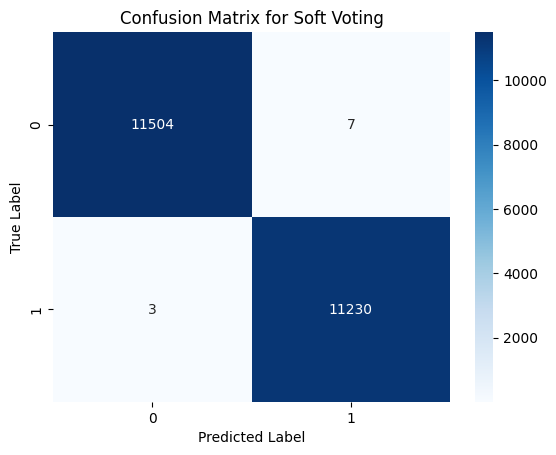

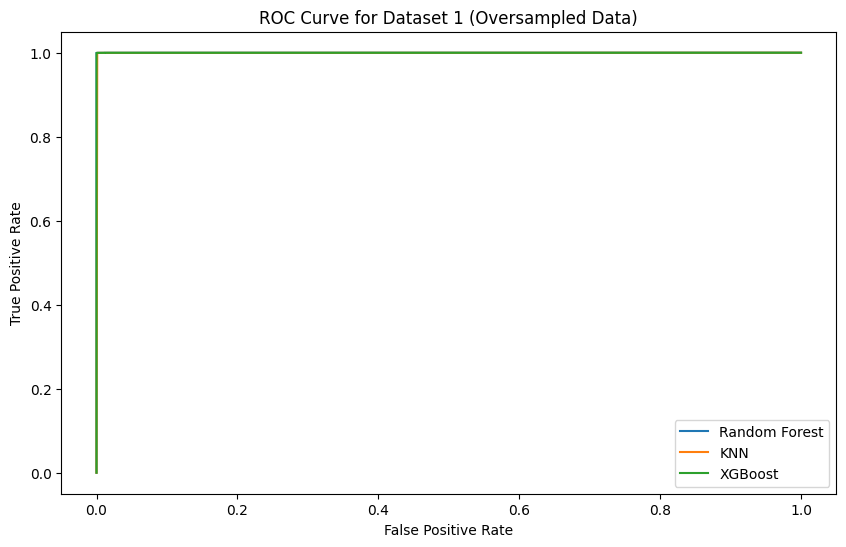


Training Models for Dataset 2 with Borderline SMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9985
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1-Score: 0.9999
ROC AUC: 0.9999


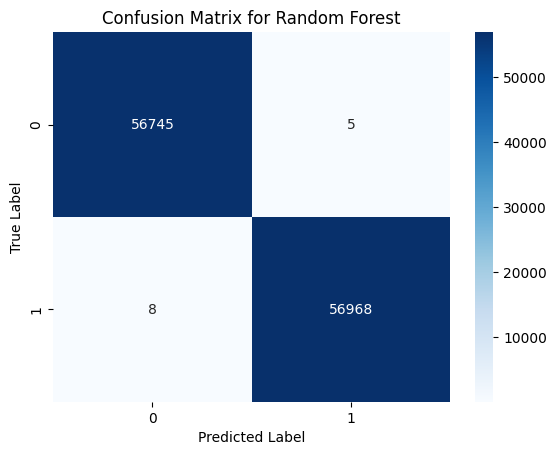

KNN:
Accuracy: 0.9979
Precision: 0.9968
Recall: 0.9991
F1-Score: 0.9979
ROC AUC: 0.9979


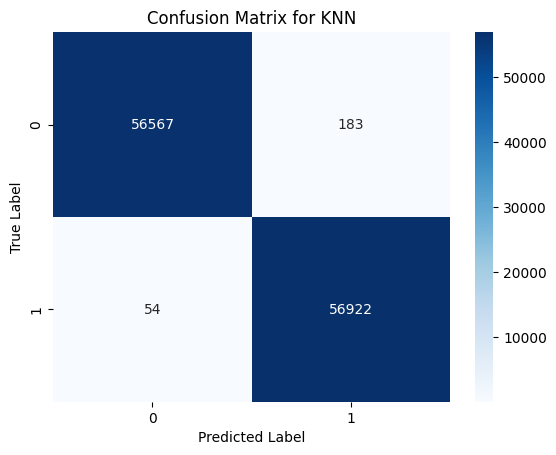

XGBoost:
Accuracy: 0.9999
Precision: 0.9998
Recall: 0.9999
F1-Score: 0.9999
ROC AUC: 0.9999


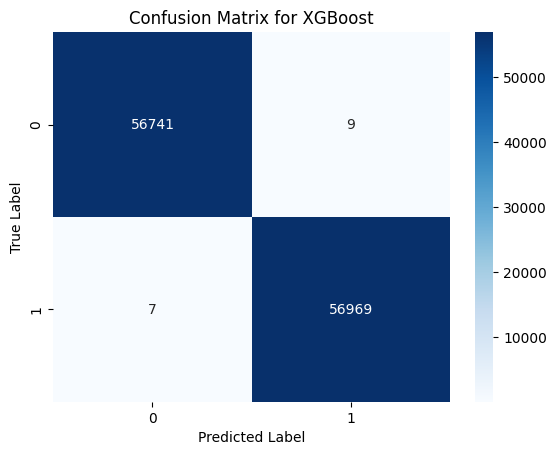

Hard Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1-Score: 0.9999
ROC AUC: 0.9999


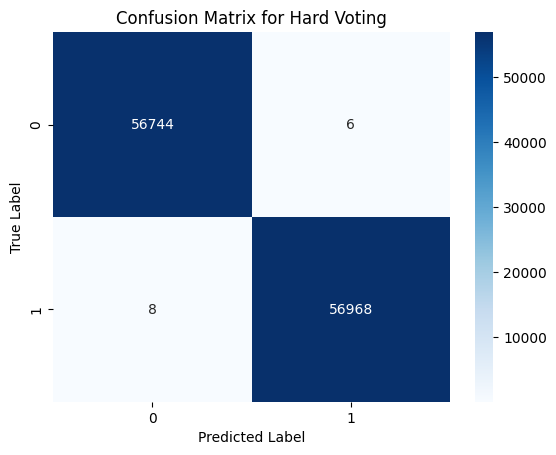

Soft Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1-Score: 0.9999
ROC AUC: 0.9999


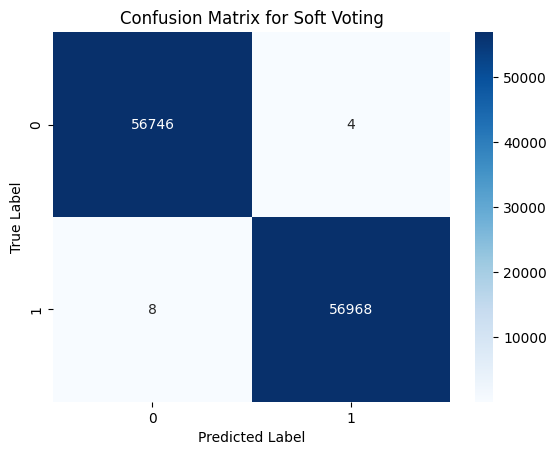

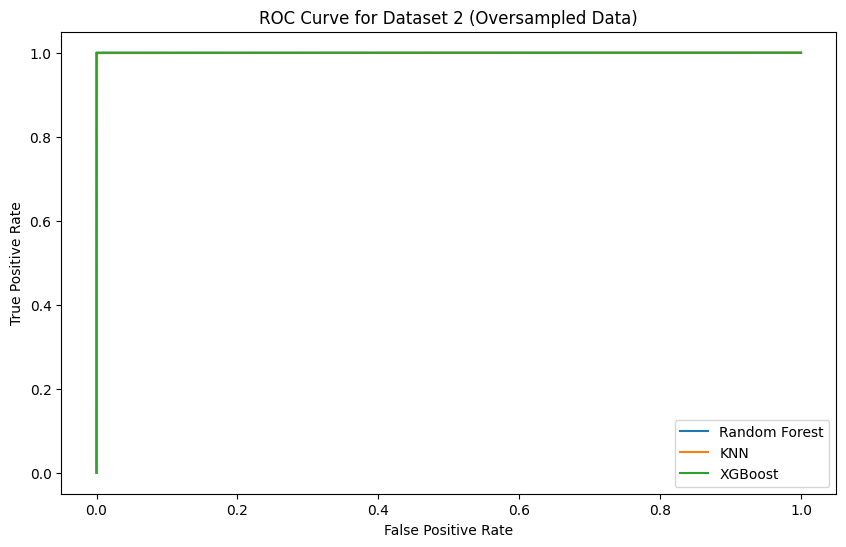

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset

print("Training and Evaluating on BorderlineSMOTE OverSampled Datasets")

for i, dataset in enumerate(oversampled_datasets4, start=1):

    print(f"\nTraining Models for Dataset {i} with Borderline SMOTE Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


* Split : 70:30


Training Models for Dataset 1 with Borderline SMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9993
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9997
Precision: 0.9996
Recall: 0.9998
F1-Score: 0.9997
ROC AUC: 0.9997


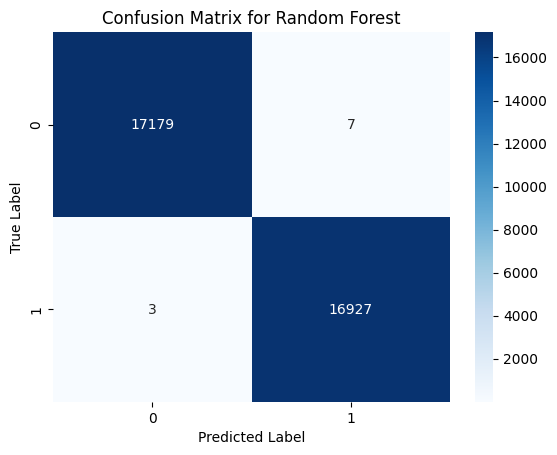

KNN:
Accuracy: 0.9987
Precision: 0.9977
Recall: 0.9997
F1-Score: 0.9987
ROC AUC: 0.9987


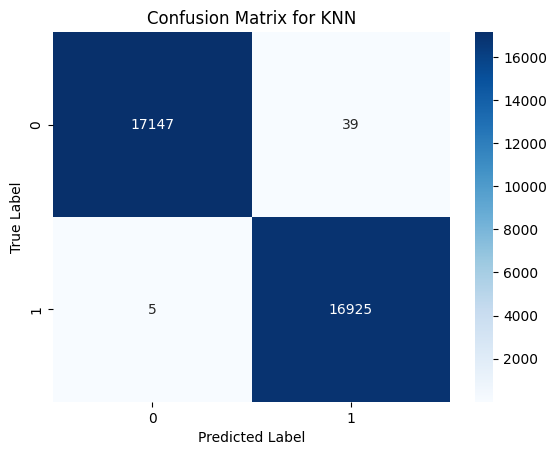

XGBoost:
Accuracy: 0.9997
Precision: 0.9996
Recall: 0.9998
F1-Score: 0.9997
ROC AUC: 0.9997


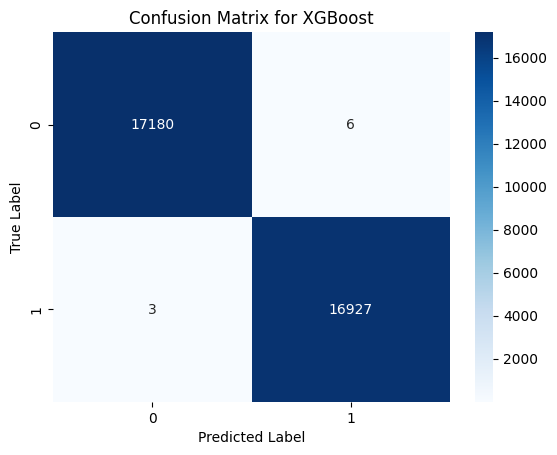

Hard Voting:
Accuracy: 0.9996
Precision: 0.9995
Recall: 0.9998
F1-Score: 0.9996
ROC AUC: 0.9996


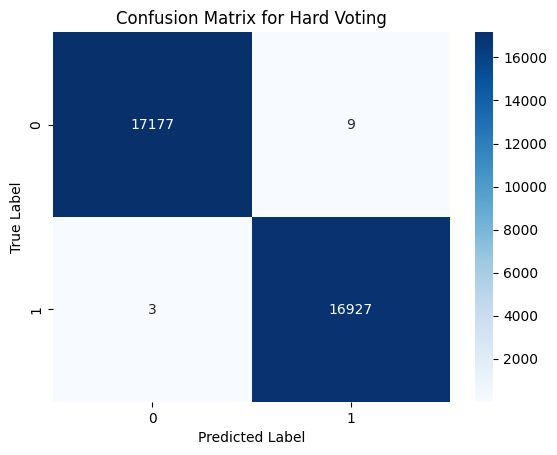

Soft Voting:
Accuracy: 0.9996
Precision: 0.9995
Recall: 0.9998
F1-Score: 0.9996
ROC AUC: 0.9996


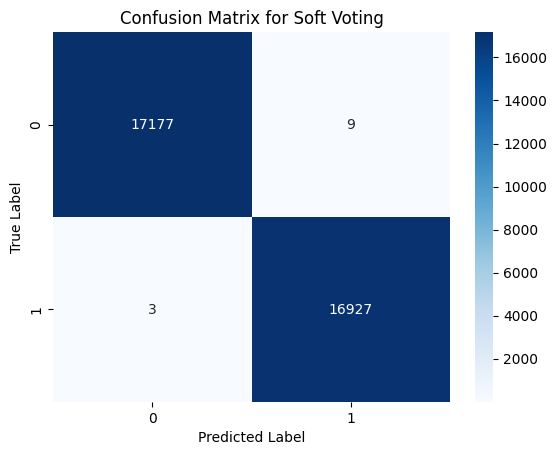

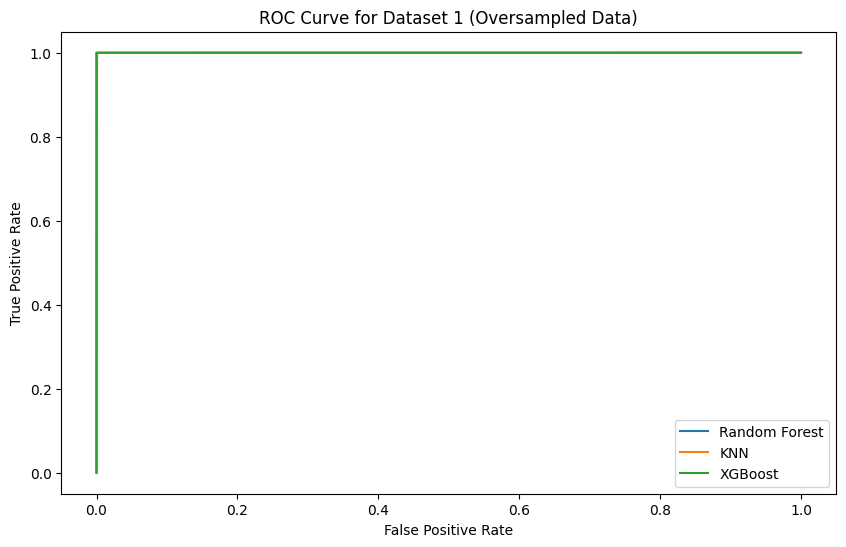


Training Models for Dataset 2 with Borderline SMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9984
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


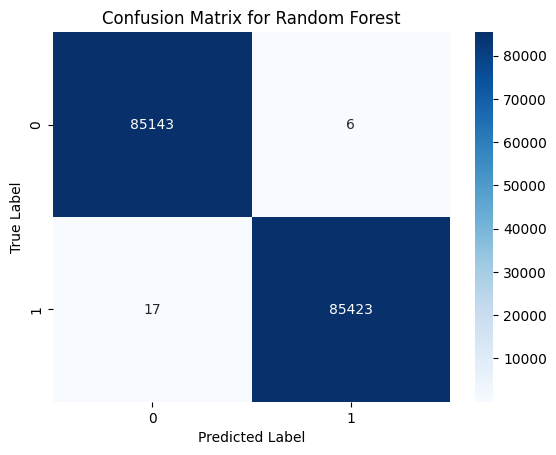

KNN:
Accuracy: 0.9977
Precision: 0.9964
Recall: 0.9991
F1-Score: 0.9977
ROC AUC: 0.9977


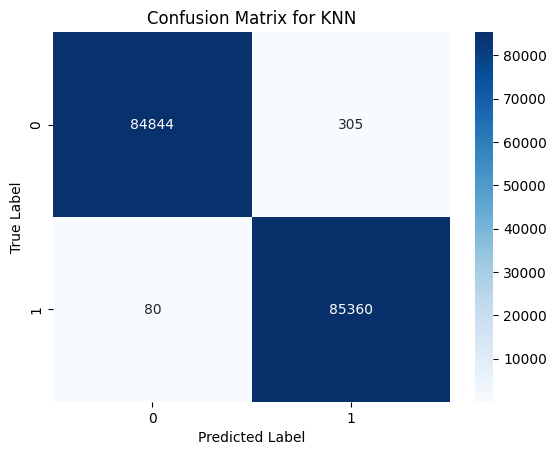

XGBoost:
Accuracy: 0.9998
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9998
ROC AUC: 0.9998


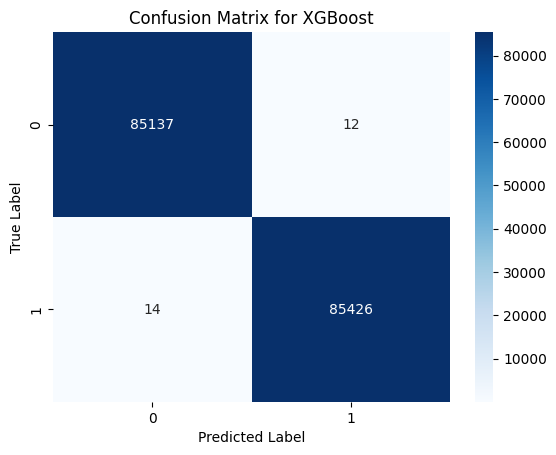

Hard Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


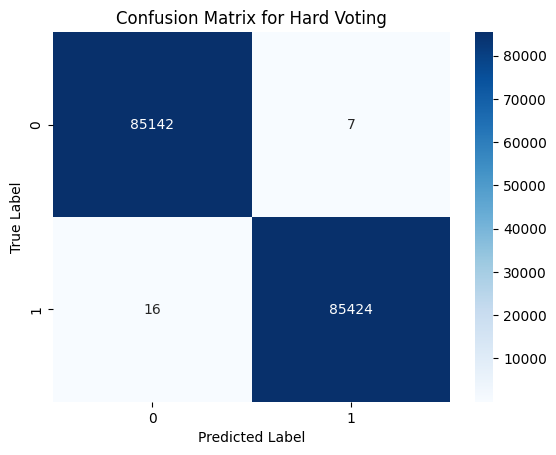

Soft Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


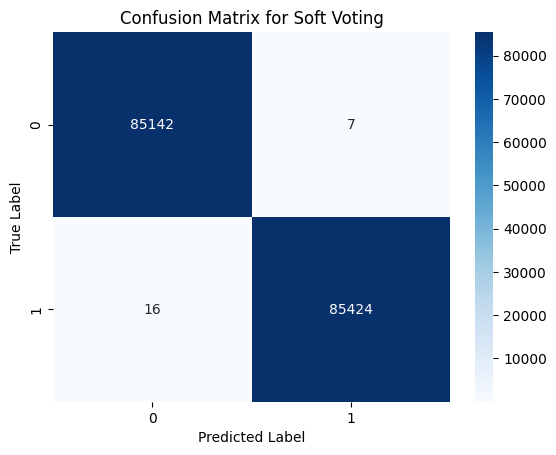

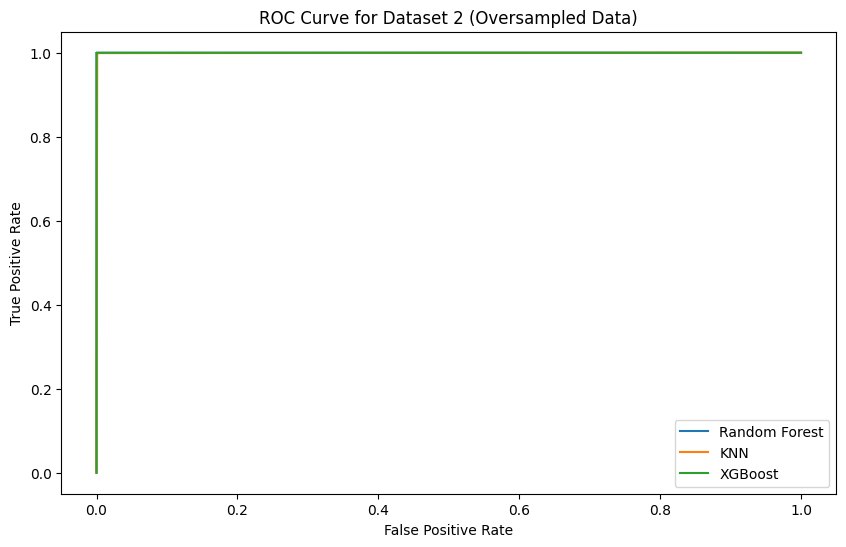

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset



for i, dataset in enumerate(oversampled_datasets4, start=1):

    print(f"\nTraining Models for Dataset {i} with Borderline SMOTE Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


# **SVMSMOTE Oversampling**

* Split = 80:20

Training and Evaluating on SVMSMOTE OverSampled Datasets

Training Models for Dataset 1 with SVMSMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9994
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9997
Precision: 0.9996
Recall: 0.9997
F1-Score: 0.9997
ROC AUC: 0.9997


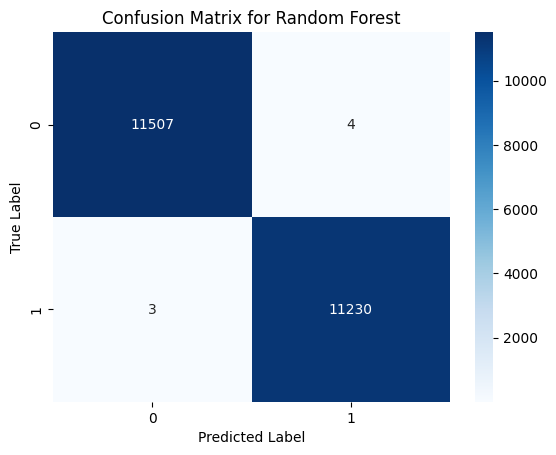

KNN:
Accuracy: 0.9987
Precision: 0.9977
Recall: 0.9996
F1-Score: 0.9987
ROC AUC: 0.9987


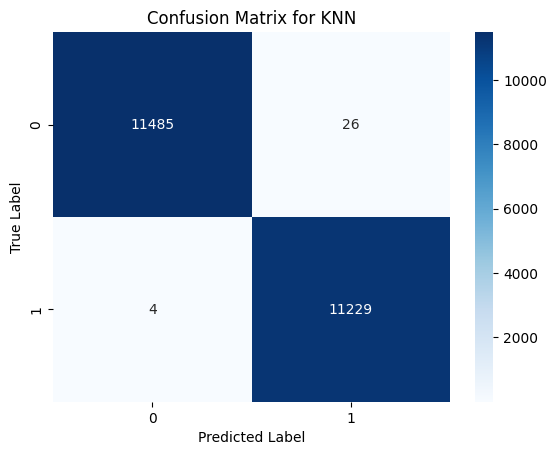

XGBoost:
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9997
F1-Score: 0.9996
ROC AUC: 0.9996


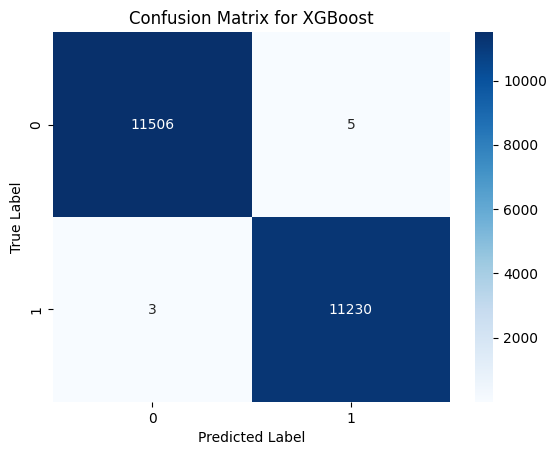

Hard Voting:
Accuracy: 0.9996
Precision: 0.9995
Recall: 0.9997
F1-Score: 0.9996
ROC AUC: 0.9996


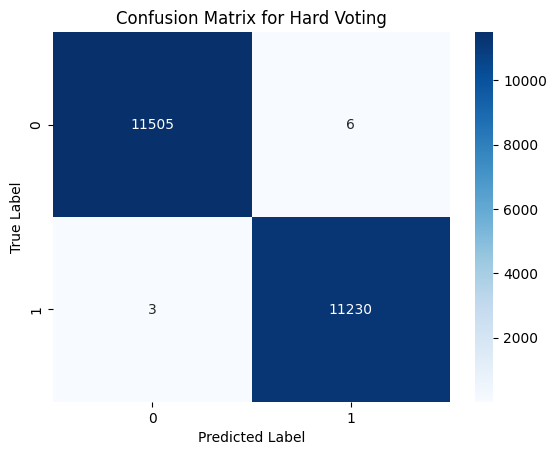

Soft Voting:
Accuracy: 0.9996
Precision: 0.9994
Recall: 0.9997
F1-Score: 0.9996
ROC AUC: 0.9996


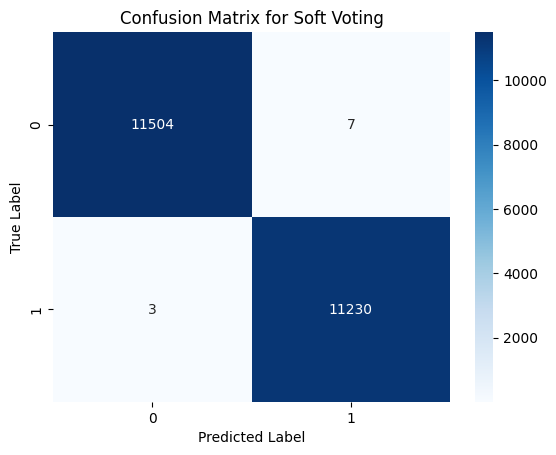

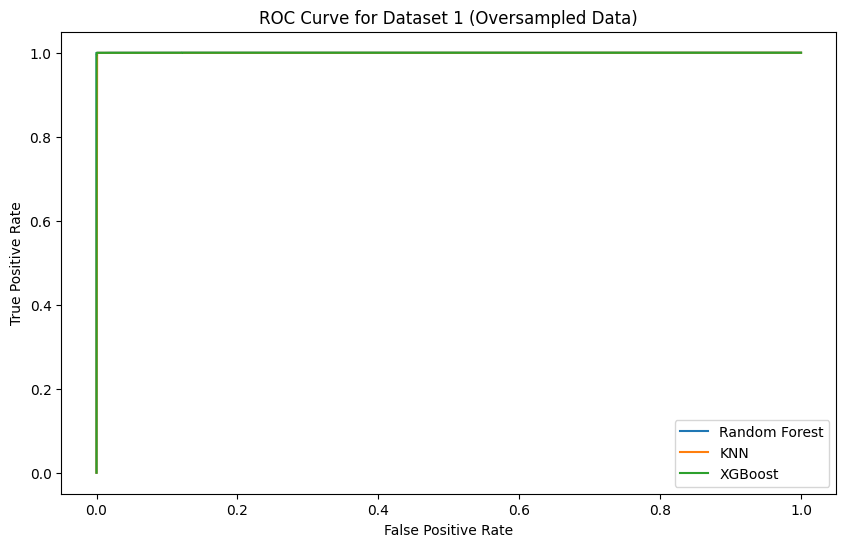


Training Models for Dataset 2 with SVMSMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9985
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


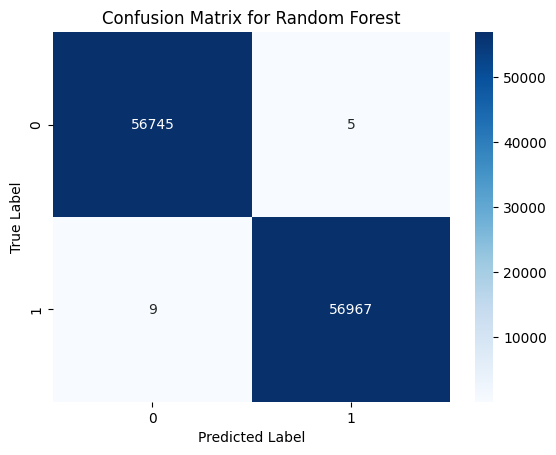

KNN:
Accuracy: 0.9979
Precision: 0.9969
Recall: 0.9990
F1-Score: 0.9979
ROC AUC: 0.9979


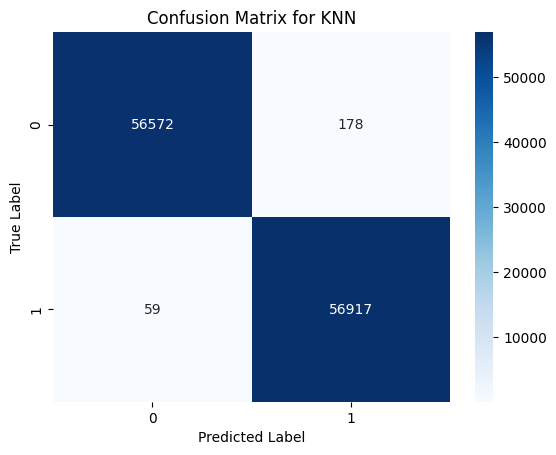

XGBoost:
Accuracy: 0.9999
Precision: 0.9998
Recall: 0.9999
F1-Score: 0.9999
ROC AUC: 0.9999


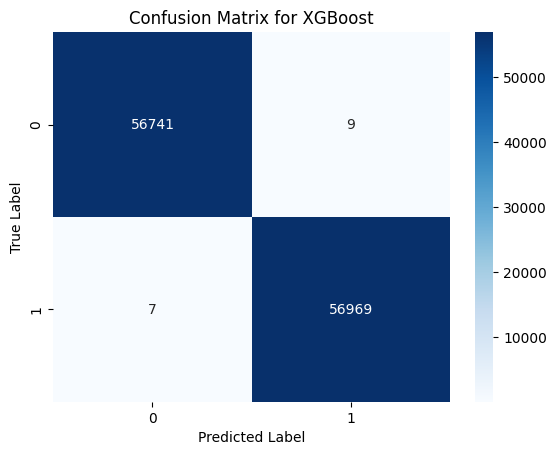

Hard Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1-Score: 0.9999
ROC AUC: 0.9999


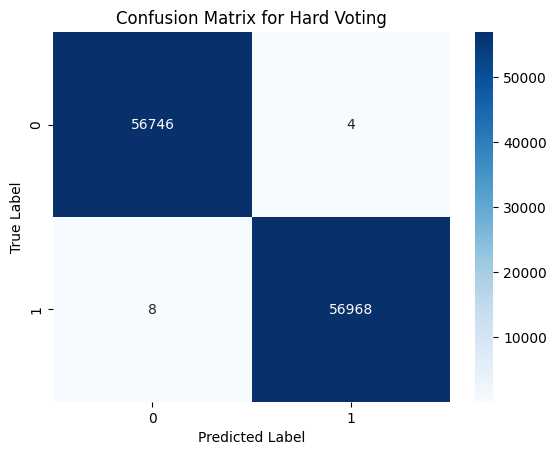

Soft Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1-Score: 0.9999
ROC AUC: 0.9999


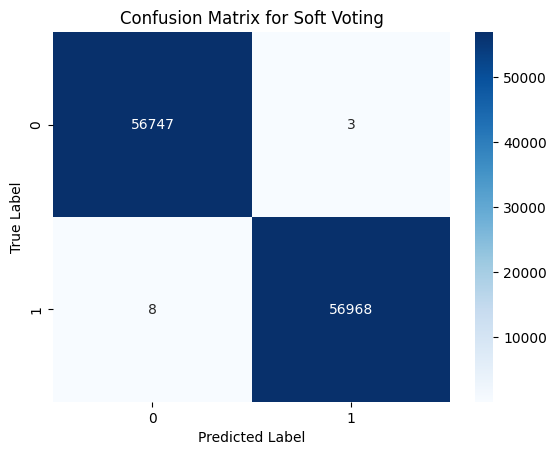

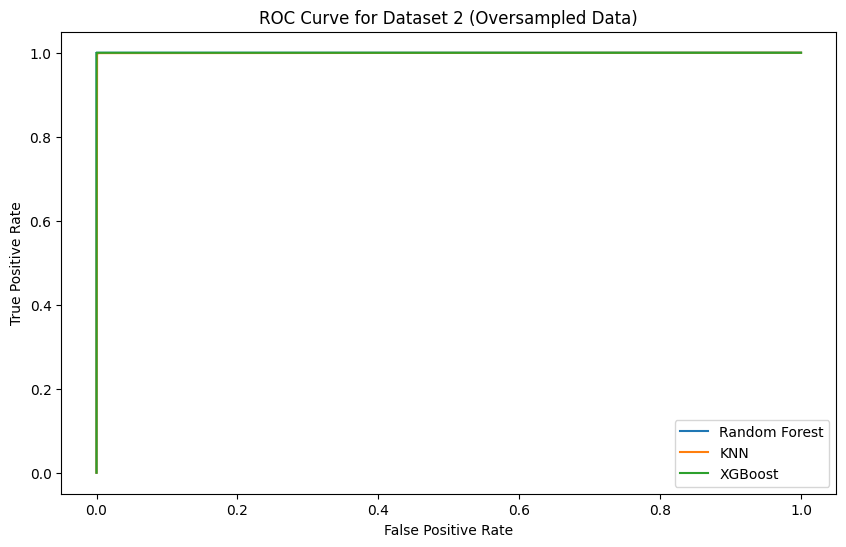

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset

print("Training and Evaluating on SVMSMOTE OverSampled Datasets")

for i, dataset in enumerate(oversampled_datasets5, start=1):

    print(f"\nTraining Models for Dataset {i} with SVMSMOTE Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()


* Split : 70:30


Training Models for Dataset 1 with SVMSMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9994
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9997
Precision: 0.9996
Recall: 0.9998
F1-Score: 0.9997
ROC AUC: 0.9997


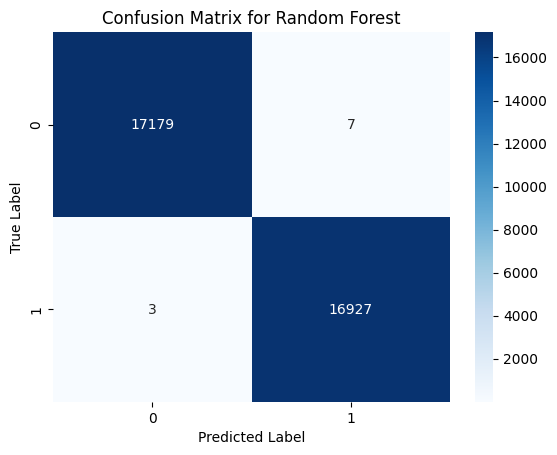

KNN:
Accuracy: 0.9988
Precision: 0.9979
Recall: 0.9997
F1-Score: 0.9988
ROC AUC: 0.9988


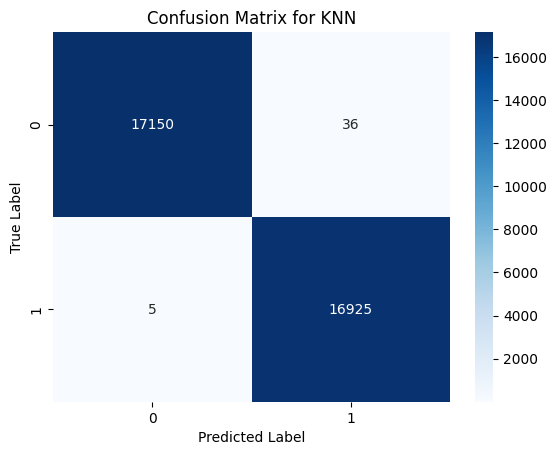

XGBoost:
Accuracy: 0.9996
Precision: 0.9994
Recall: 0.9998
F1-Score: 0.9996
ROC AUC: 0.9996


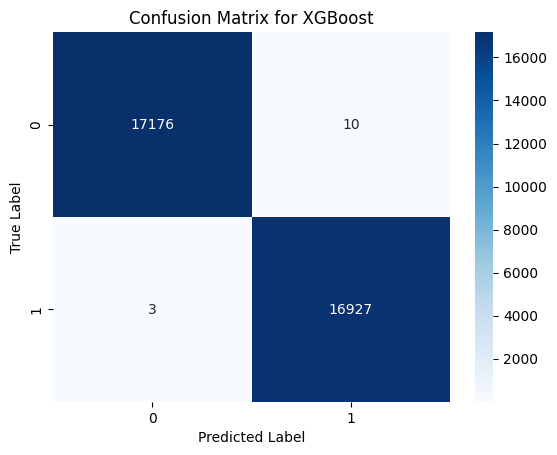

Hard Voting:
Accuracy: 0.9996
Precision: 0.9995
Recall: 0.9998
F1-Score: 0.9996
ROC AUC: 0.9996


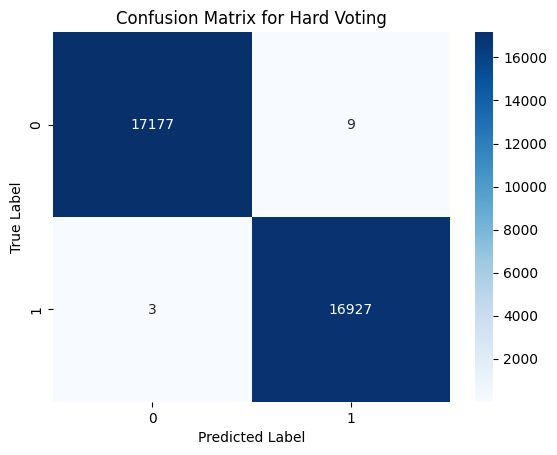

Soft Voting:
Accuracy: 0.9996
Precision: 0.9994
Recall: 0.9998
F1-Score: 0.9996
ROC AUC: 0.9996


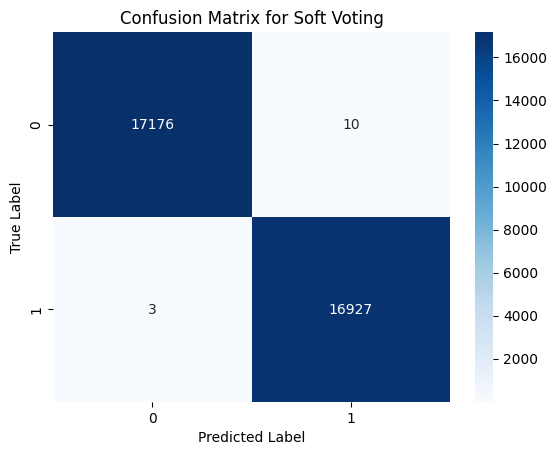

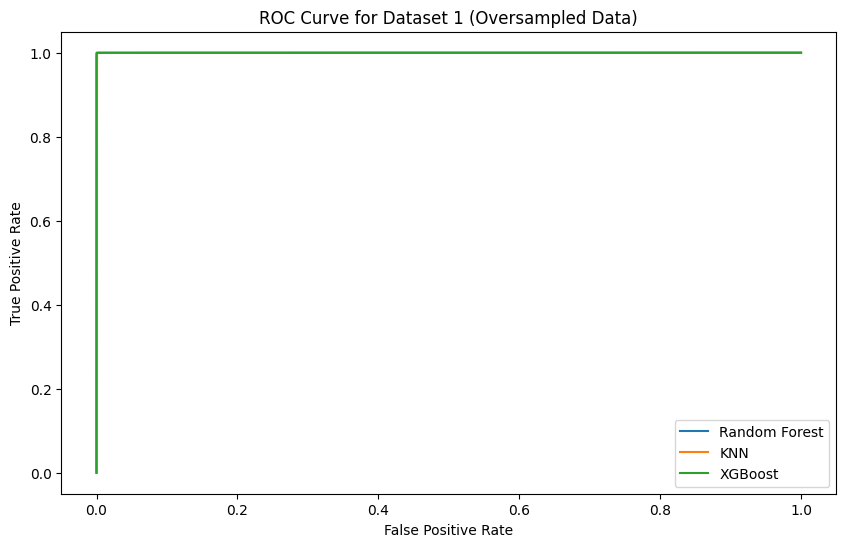


Training Models for Dataset 2 with SVMSMOTE Oversampled data
Training Accuracy of All models :
Random Forest : 1.0000
KNN : 0.9984
XGBoost : 1.0000


Training Accuracy of ensamble models :
Hard Voting  : 1.0000
Soft Voting : 1.0000


Testing Accuracy of All models :
Random Forest:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


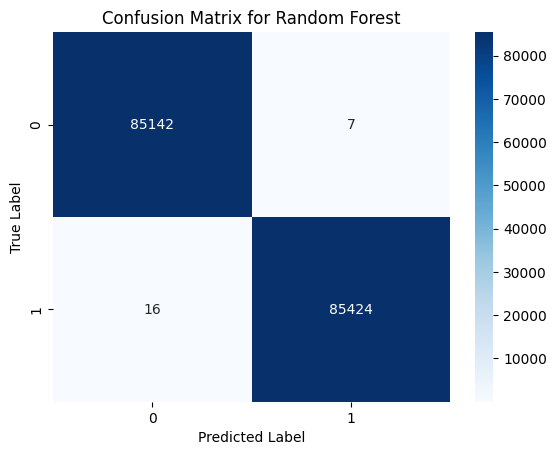

KNN:
Accuracy: 0.9977
Precision: 0.9966
Recall: 0.9989
F1-Score: 0.9977
ROC AUC: 0.9977


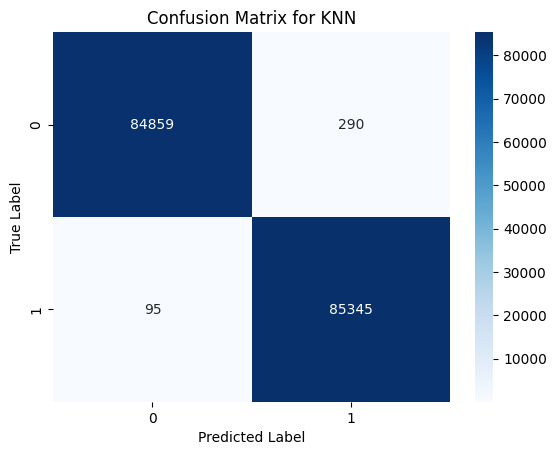

XGBoost:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


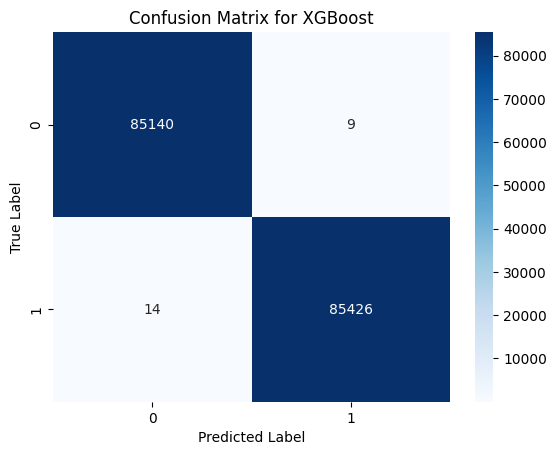

Hard Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


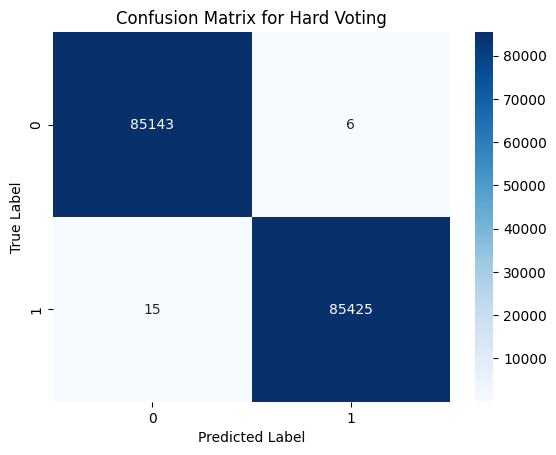

Soft Voting:
Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1-Score: 0.9999
ROC AUC: 0.9999


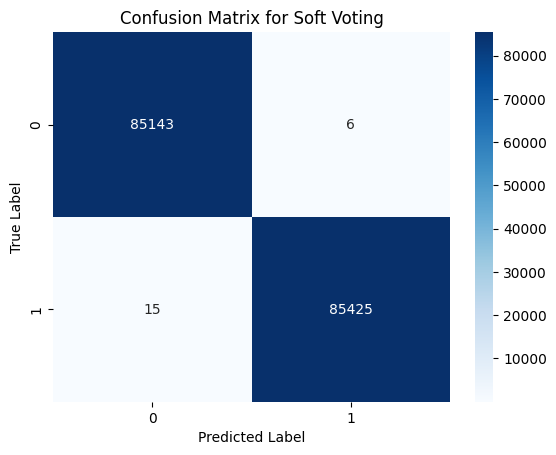

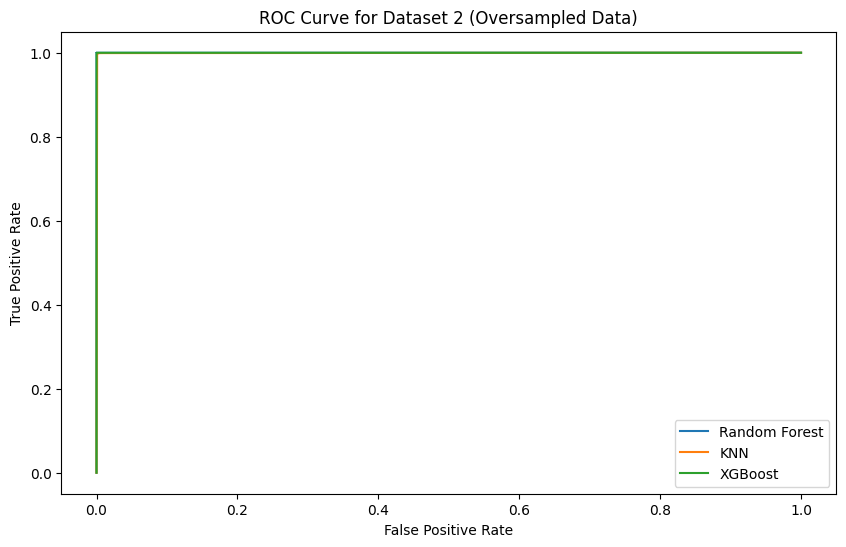

In [ ]:
# Train above OverSampled dataset separately one by one on RandomForest Classifier , KNN and XGBoost , ensemble them using hard and Soft voting method and give metrices all , Plot Confusion Matrix and Also plot only single roc curve in a graph for all three models for each dataset


for i, dataset in enumerate(oversampled_datasets5, start=1):

    print(f"\nTraining Models for Dataset {i} with SVMSMOTE Oversampled data")

    X = dataset.drop('Class', axis=1)

    y = dataset['Class']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



    # Train individual models

    rf_model = RandomForestClassifier(random_state=42)

    knn_model = KNeighborsClassifier()

    xgb_model = XGBClassifier(random_state=42)



    rf_model.fit(X_train, y_train)

    knn_model.fit(X_train, y_train)

    xgb_model.fit(X_train, y_train)



    print("Training Accuracy of All models :")

    rf_train_acc = rf_model.score(X_train, y_train)

    knn_train_acc = knn_model.score(X_train, y_train)

    xgb_train_acc = xgb_model.score(X_train, y_train)

    print(f"Random Forest : {rf_train_acc:.4f}")

    print(f"KNN : {knn_train_acc:.4f}")

    print(f"XGBoost : {xgb_train_acc:.4f}")

    print("\n")



    # Make predictions

    rf_pred = rf_model.predict(X_test)

    knn_pred = knn_model.predict(X_test)

    xgb_pred = xgb_model.predict(X_test)



    # Ensemble models

    voting_hard = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='hard')

    voting_soft = VotingClassifier(estimators=[('rf', rf_model), ('knn', knn_model), ('xgb', xgb_model)], voting='soft')



    voting_hard.fit(X_train, y_train)

    voting_soft.fit(X_train, y_train)



    print("Training Accuracy of ensamble models :")

    hard_train_acc = voting_hard.score(X_train, y_train)

    soft_train_acc = voting_soft.score(X_train, y_train)

    print(f"Hard Voting  : {hard_train_acc:.4f}")

    print(f"Soft Voting : {soft_train_acc:.4f}")



    print("\n")

    print("Testing Accuracy of All models :")



    hard_voting_pred = voting_hard.predict(X_test)

    soft_voting_pred = voting_soft.predict(X_test)



    # Evaluate models

    def evaluate_model(y_true, y_pred, model_name):

        accuracy = accuracy_score(y_true, y_pred)

        precision = precision_score(y_true, y_pred)

        recall = recall_score(y_true, y_pred)

        f1 = f1_score(y_true, y_pred)

        roc_auc = roc_auc_score(y_true, y_pred)

        print(f"{model_name}:")

        print(f"Accuracy: {accuracy:.4f}")

        print(f"Precision: {precision:.4f}")

        print(f"Recall: {recall:.4f}")

        print(f"F1-Score: {f1:.4f}")

        print(f"ROC AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

        plt.title(f'Confusion Matrix for {model_name}')

        plt.xlabel('Predicted Label')

        plt.ylabel('True Label')

        plt.show()



    evaluate_model(y_test, rf_pred, "Random Forest")

    evaluate_model(y_test, knn_pred, "KNN")

    evaluate_model(y_test, xgb_pred, "XGBoost")

    evaluate_model(y_test, hard_voting_pred, "Hard Voting")

    evaluate_model(y_test, soft_voting_pred, "Soft Voting")



    # ROC Curve

    plt.figure(figsize=(10, 6))

    fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

    fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])



    plt.plot(fpr_rf, tpr_rf, label='Random Forest')

    plt.plot(fpr_knn, tpr_knn, label='KNN')

    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')



    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title(f'ROC Curve for Dataset {i} (Oversampled Data)')

    plt.legend()

    plt.show()

# **Results and Observations**



| Sampling Type       | Model            | Train-Test Split | Accuracy (Dataset 1) | Accuracy (Dataset 2) | Precision (Dataset 1) | Precision (Dataset 2) | Recall (Dataset 1) | Recall (Dataset 2) |
|---------------------|------------------|------------------|-----------------------|-----------------------|------------------------|------------------------|---------------------|---------------------|
| Undersampling       | Random Forest    | 80:20           | 85.4                 | 92.3                 | 88.2                   | 95.6                   | 79.0                | 88.8               |
| Undersampling       | KNN              | 80:20           | 82.9                 | 65.4                 | 87.5                   | 65.9                   | 73.6                | 63.2               |
| Undersampling       | XGBoost          | 80:20           | 87.8                 | 93.4                 | 85.0                   | 95.7                   | 89.5                | 89.4               |
| Undersampling       | Voting Ensemble  | 80:20           | 90.2                 | 93.0                 | 89.5                   | 96.6                   | 89.5                | 89.8               |
| Random Oversampling | Random Forest    | 80:20           | 100.0                | 100.0                | 99.9                   | 99.9                   | 100.0               | 100.0              |
| Random Oversampling | KNN              | 80:20           | 99.4                 | 99.4                 | 99.8                   | 99.8                   | 100.0               | 100.0              |
| Random Oversampling | XGBoost          | 80:20           | 99.9                 | 99.9                 | 99.8                   | 99.9                   | 100.0               | 100.0              |
| Random Oversampling | Voting Ensemble  | 80:20           | 99.9                 | 99.9                 | 99.8                   | 99.8                   | 100.0               | 100.0              |
| ADASYN              | Random Forest    | 80:20           | 99.9                 | 99.9                 | 99.7                   | 99.8                   | 100.0               | 99.9               |
| ADASYN              | KNN              | 80:20           | 96.0                 | 95.0                 | 99.1                   | 94.9                   | 100.0               | 97.9               |
| ADASYN              | XGBoost          | 80:20           | 99.6                 | 99.9                 | 99.3                   | 99.6                   | 100.0               | 99.9               |
| ADASYN              | Voting Ensemble  | 80:20           | 99.7                 | 99.9                 | 99.5                   | 99.8                   | 100.0               | 99.9               |
| SMOTE               | Random Forest    | 80:20           | 100.0                | 100.0                | 99.9                   | 100.0                  | 100.0               | 100.0              |
| SMOTE               | KNN              | 80:20           | 98.0                 | 99.0                 | 98.2                   | 99.0                   | 100.0               | 98.9               |
| SMOTE               | XGBoost          | 80:20           | 99.9                 | 99.9                 | 99.7                   | 99.8                   | 100.0               | 100.0              |
| SMOTE               | Voting Ensemble  | 80:20           | 99.8                 | 99.8                 | 99.8                   | 99.8                   | 100.0               | 99.9               |
| SVMSMOTE            | Random Forest    | 80:20           | 99.5                 | 99.3                 | 99.2                   | 99.3                   | 98.4                | 99.2               |
| SVMSMOTE            | KNN              | 80:20           | 97.8                 | 94.2                 | 96.8                   | 94.3                   | 93.2                | 92.8               |
| SVMSMOTE            | XGBoost          | 80:20           | 99.7                 | 99.5                 | 99.4                   | 99.5                   | 99.1                | 99.3               |
| SVMSMOTE            | Voting Ensemble  | 80:20           | 99.6                 | 99.7                 | 99.6                   | 99.7                   | 99.3                | 99.5               |
| Borderline SMOTE    | Random Forest    | 80:20           | 99.7                 | 99.8                 | 99.6                   | 99.8                   | 99.1                | 99.4               |
| Borderline SMOTE    | KNN              | 80:20           | 98.5                 | 96.1                 | 98.4                   | 96.7                   | 95.3                | 96.5               |
| Borderline SMOTE    | XGBoost          | 80:20           | 99.8                 | 99.7                 | 99.7                   | 99.7                   | 99.3                | 99.6               |
| Borderline SMOTE    | Voting Ensemble  | 80:20           | 99.9                 | 99.9                 | 99.8                   | 99.9                   | 99.4                | 99.8               |
